# 1.Kutuphanelerin eklenmesi 

In [ ]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
%matplotlib inline
from scipy import stats

# Ön işleme kütüphaneleri
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Sınıflandırma kütüphaneleri
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Gelecekteki uyarıları önlemek ve rastgele değişkenler için ayarlar
import random
random.seed(54)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import warnings
warnings.filterwarnings('ignore')


# 2.Data Hakkinda bilgiler

**Verisetindeki Ozelliklerin Aciklanmasi**

Bu veri setinde 13 değişken bulunmaktadır:

    9 tane kategorik değişken,

    4 tane sürekli değişken.

<table style="width:100%">
  <thead>
    <tr>
      <th style="text-align:center; font-weight: bold; font-size:14px">Değişken Adı</th>
      <th style="text-align:center; font-weight: bold; font-size:14px">Açıklama</th>
      <th style="text-align:center; font-weight: bold; font-size:14px">Örnek Veri</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><b>Cinsiyet</b></td>
      <td>Bireyin cinsiyeti</td>
      <td>Erkek; Kadın</td>
    </tr>
    <tr>
      <td><b>Yaş Grubu</b></td>
      <td>Bireyin ait olduğu yaş grubu</td>
      <td>18-30, 31-40, 41-50, 51-60, &gt;60</td>
    </tr>
    <tr>
      <td><b>Medeni Durum</b></td>
      <td>Evli veya bekar durumu</td>
      <td>Bekar; Evli</td>
    </tr>
    <tr>
      <td><b>Eğitim Düzeyi</b></td>
      <td>Bireyin eğitim düzeyi</td>
      <td>Lisans, Yüksek Lisans, Lise, vb.</td>
    </tr>
    <tr>
      <td><b>İstihdam Durumu</b></td>
      <td>Bireyin istihdam durumu</td>
      <td>Çalışıyor, İşsiz, Serbest Meslek, Emekli</td>
    </tr>
    <tr>
      <td><b>Yıllık Ortalama Gelir</b></td>
      <td>Bireyin yıllık ortalama geliri</td>
      <td>74826; 246298; ...</td>
    </tr>
    <tr>
      <td><b>Yaşadığı Şehir</b></td>
      <td>Bireyin yaşadığı şehir türü</td>
      <td>Büyük Şehir, Küçük Şehir, Kırsal, Köy</td>
    </tr>
    <tr>
      <td><b>En Çok İlgilendiği Ürün Kategorisi</b></td>
      <td>Bireyin en çok ilgilendiği ürün kategorisi</td>
      <td>Elektronik, Giyim, Spor Ekipmanları, vb.</td>
    </tr>
    <tr>
      <td><b>Yıllık Ortalama Satın Alım Miktarı</b></td>
      <td>Bireyin yıllık ortalama satın aldığı ürün miktarı</td>
      <td>360; 120; ...</td>
    </tr>
    <tr>
      <td><b>Yıllık Ortalama Sipariş Verilen Ürün Adedi</b></td>
      <td>Bireyin yıllık ortalama sipariş verdiği ürün sayısı</td>
      <td>-</td>
    </tr>
    <tr>
      <td><b>Eğitime Devam Etme Durumu</b></td>
      <td>Bireyin eğitimine devam edip etmediği</td>
      <td>Devam Ediyor, Devam Etmiyor</td>
    </tr>
    <tr>
      <td><b>Yıllık Ortalama Sepete Atılan Ürün Adedi</b></td>
      <td>Bireyin yıllık ortalama sepete eklediği ürün adedi</td>
      <td>Y; N</td>
    </tr>
    <tr>
      <td><b>Sınıflandırma Etiketleri</b></td>
      <td>Sınıflandırma modeli ile tahmin edilmesi beklenen etiket veya kategori</td>
      <td>obek_1, obek_2, obek_3, ...</td>
    </tr>
  </tbody>
</table>


In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test_x.csv')


**Train verisetindeki ilk 5 veri**

In [4]:
train.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


**Veri Turleri**


In [6]:
train.dtypes

Cinsiyet                                       object
Yaş Grubu                                      object
Medeni Durum                                   object
Eğitim Düzeyi                                  object
İstihdam Durumu                                object
Yıllık Ortalama Gelir                         float64
Yaşadığı Şehir                                 object
En Çok İlgilendiği Ürün Grubu                  object
Yıllık Ortalama Satın Alım Miktarı            float64
Yıllık Ortalama Sipariş Verilen Ürün Adedi    float64
Eğitime Devam Etme Durumu                      object
Öbek İsmi                                      object
Yıllık Ortalama Sepete Atılan Ürün Adedi      float64
dtype: object

**Verisetinde bos veri kontrolu**

In [7]:
train.isnull().sum()

Cinsiyet                                      0
Yaş Grubu                                     0
Medeni Durum                                  0
Eğitim Düzeyi                                 0
İstihdam Durumu                               0
Yıllık Ortalama Gelir                         0
Yaşadığı Şehir                                0
En Çok İlgilendiği Ürün Grubu                 0
Yıllık Ortalama Satın Alım Miktarı            0
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0
Eğitime Devam Etme Durumu                     0
Öbek İsmi                                     0
Yıllık Ortalama Sepete Atılan Ürün Adedi      0
dtype: int64

**Tekrar eden veri var mi kontrolu**

In [8]:
train.duplicated().sum()

0

**Istatistiksel Sonuclar**

In [9]:
train.describe()

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
count,5.460000e+03,5460.000000,5460.000000,5460.000000
mean,3.635711e+05,16616.612217,24.040884,73.445693
std,2.197144e+05,14099.171704,14.945655,47.214184
min,4.392299e+04,2859.254000,0.000000,3.977559
25%,2.156934e+05,4931.859057,11.550502,25.009168
50%,2.869254e+05,8426.818967,20.095924,82.485579
75%,4.681882e+05,30579.244695,35.918161,104.473291
max,1.192437e+06,48605.594415,64.616196,242.308441


# 3. Verilerin Analizi 


Bu bölümde, verileri keşfetmeyi ve olası desenleri veya içgörüleri görsel olarak ortaya çıkarmayı amaçlıyoruz. Görselleştirmeye başlamadan önce, analizde verimliliği artırmak için kategorik ve sayısal verileri ayıracağız.

In [10]:
continous_features=['Yıllık Ortalama Gelir','Yıllık Ortalama Satın Alım Miktarı','Yıllık Ortalama Sipariş Verilen Ürün Adedi','Yıllık Ortalama Sepete Atılan Ürün Adedi']
categorical_features=['Cinsiyet','Yaş Grubu','Medeni Durum','Eğitim Düzeyi','İstihdam Durumu','Yaşadığı Şehir','En Çok İlgilendiği Ürün Grubu','Eğitime Devam Etme Durumu']

## 3.1 Kategorik Degiskenler 📊

**Cinsiyet Dagilimi**

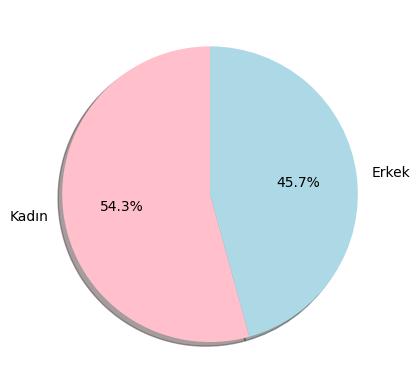

In [11]:
labels_pie = ["Kadın","Erkek"]
values = train['Cinsiyet'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['pink', 'lightblue']
ax1.pie(values, labels=labels_pie, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

Pasta grafiğinde açıkça görebiliyoruz ki, veri setinde Kadınların yüzdesi %54.3, Erkeklerin yüzdesi ise %45.7'dir.

**Yas Gruplarinin Dagilimi**

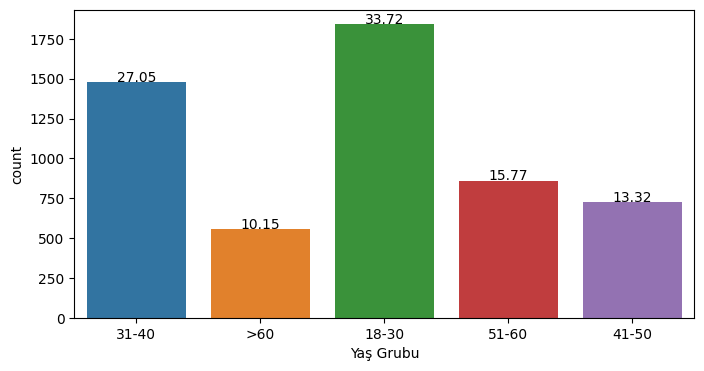

In [12]:
plt.figure(figsize=(8,4))
total = float(len(train) )

ax = sns.countplot(x="Yaş Grubu", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

18 ile 30 yaş arasında olan kişilerin sayısı diğer yaş gruplarına kıyasla daha fazladır.


**Evlilik Oranlari**

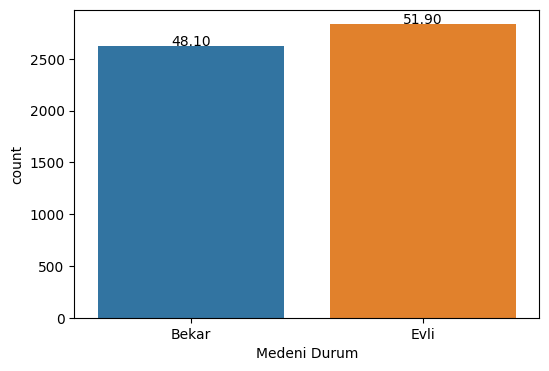

In [13]:
plt.figure(figsize=(6,4))
total = float(len(train) )

ax = sns.countplot(x="Medeni Durum", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Evli olan kişilerin sayısı, bekâr olanlara kıyasla daha fazladır.

**Egitim Seviye Duzeyleri**

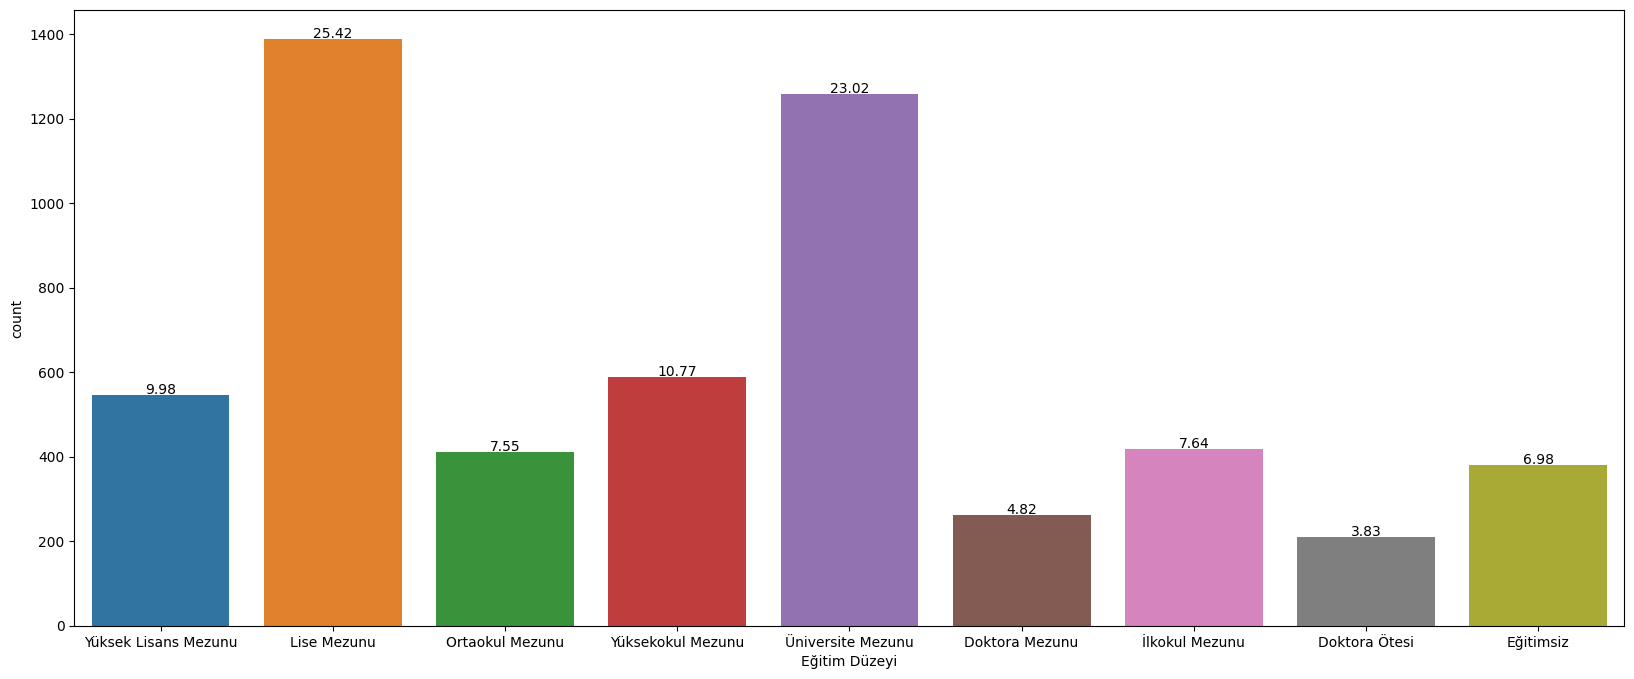

In [14]:
plt.figure(figsize=(20,8))
total = float(len(train["Eğitim Düzeyi"]) )

ax = sns.countplot(x="Eğitim Düzeyi", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


Liseden ve üniversiteden mezun olan kişilerin sayısı, diğer eğitim seviyelerine göre daha fazladır.

**Istihdam Durumu**

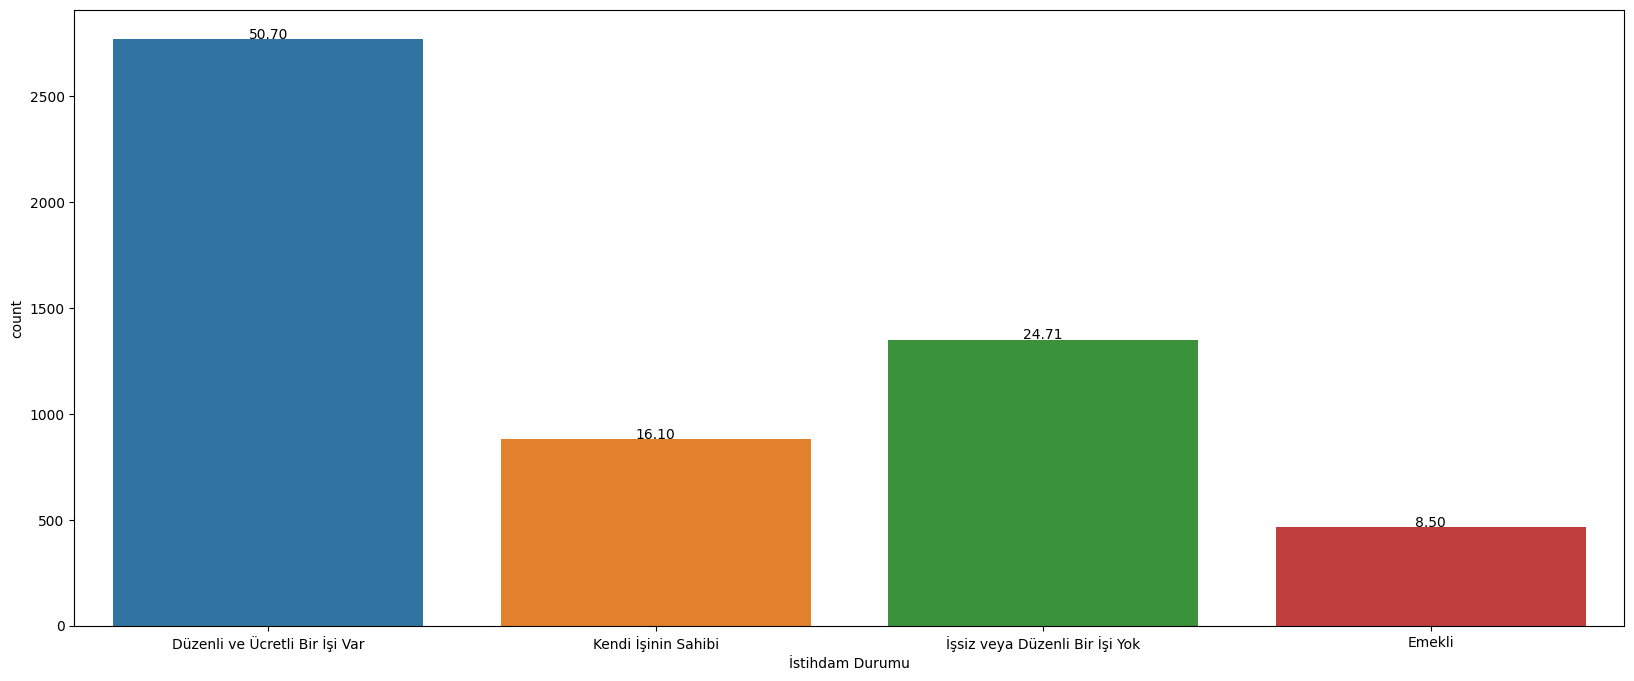

In [15]:
plt.figure(figsize=(20,8))
total = float(len(train['İstihdam Durumu']) )

ax = sns.countplot(x="İstihdam Durumu", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Düzenli ve ücretli bir işi olan kişilerin sayısı oldukça fazladır. İşsiz olan ve düzenli bir işi olmayanların oranı ise %24.71'dir.

**Yasadiklari Yerlesim Turleri**

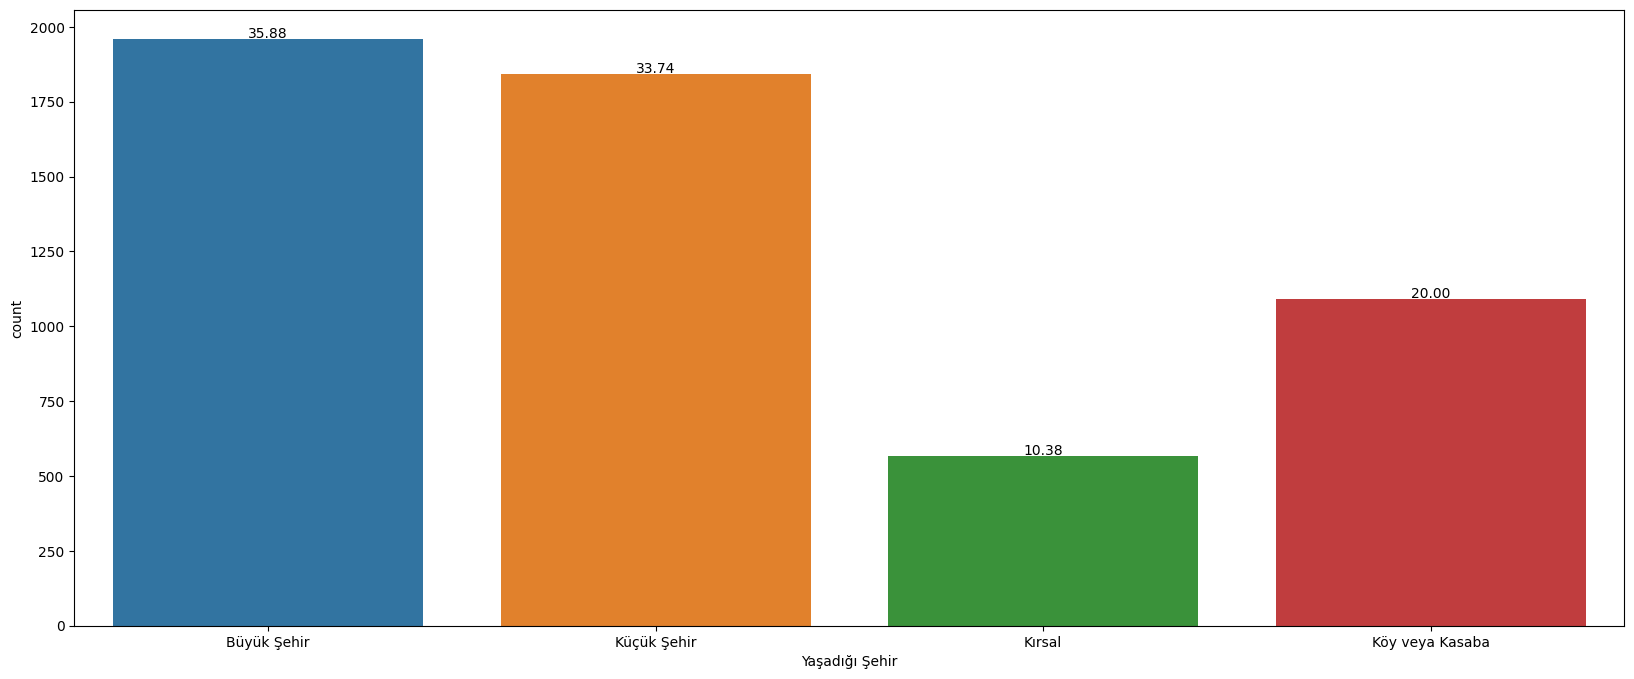

In [16]:
plt.figure(figsize=(20,8))
total = float(len(train['Yaşadığı Şehir']) )

ax = sns.countplot(x="Yaşadığı Şehir", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Büyük şehirlerde ve küçük şehirlerde yaşayan insanların sayısı fazladır.

**En cok ilgilendikleri urunlerin analizi**

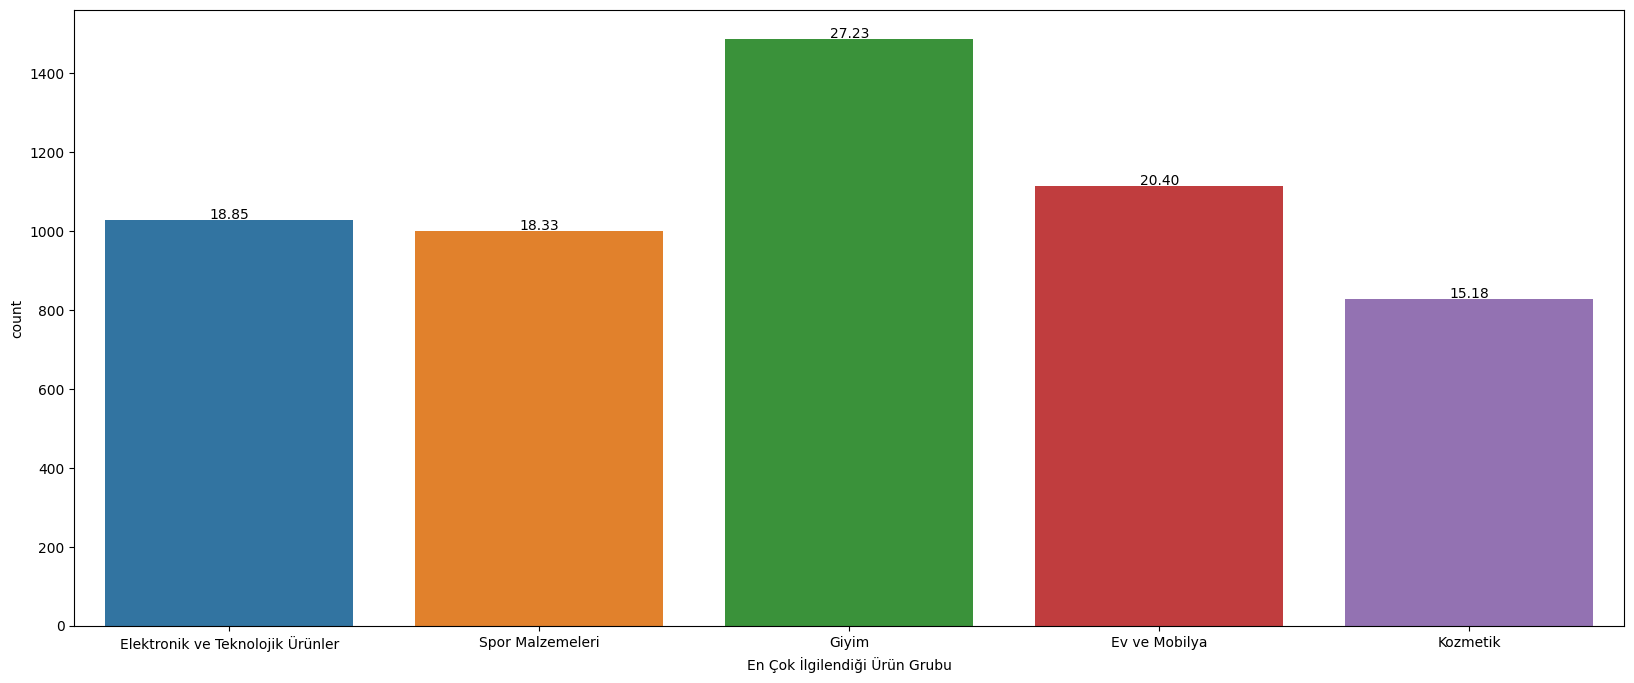

In [17]:
plt.figure(figsize=(20,8))
total = float(len(train['En Çok İlgilendiği Ürün Grubu']) )

ax = sns.countplot(x="En Çok İlgilendiği Ürün Grubu", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

 En cok ilgi duyulan giyim urunleri oldu

**Egitim Oranlari**

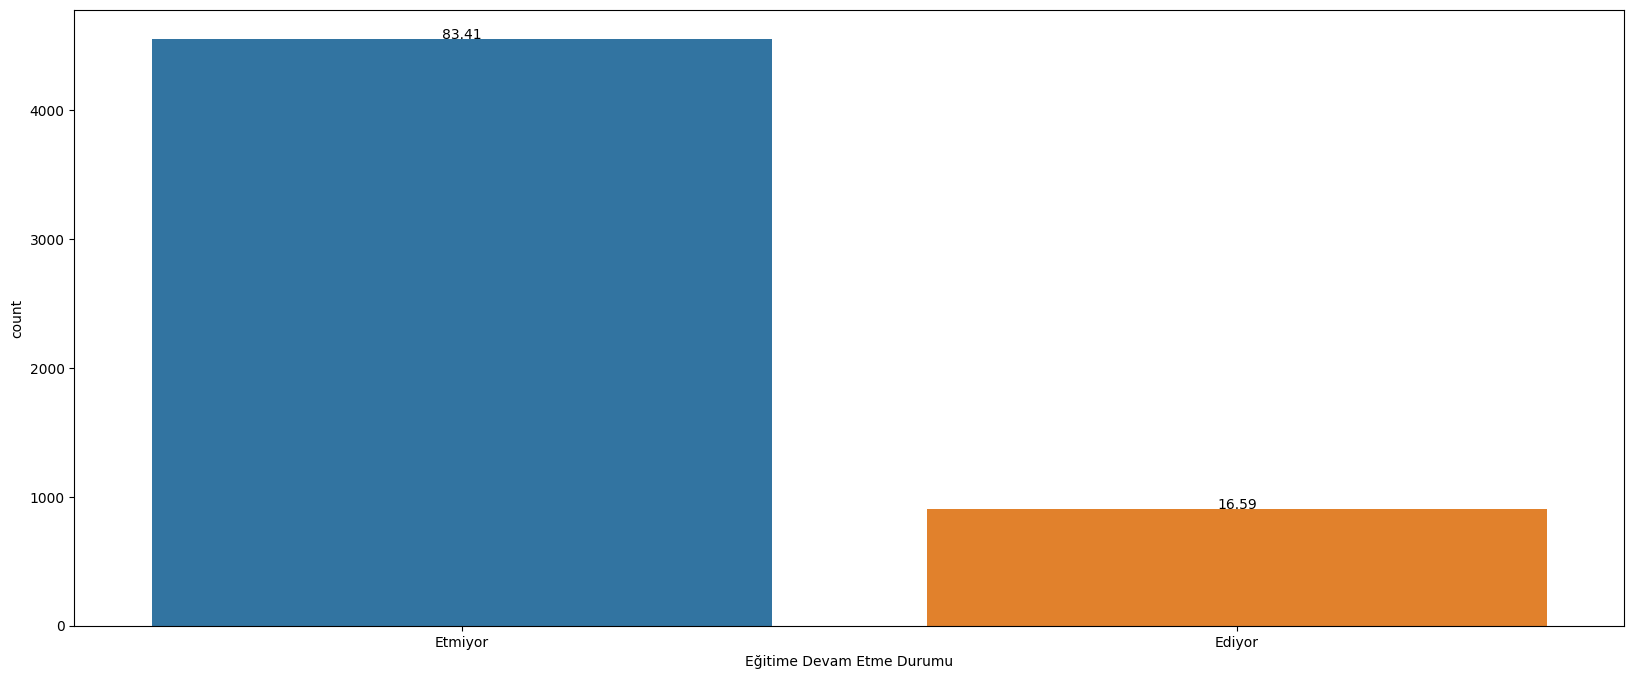

In [18]:
plt.figure(figsize=(20,8))
total = float(len(train['Eğitime Devam Etme Durumu']) )

ax = sns.countplot(x="Eğitime Devam Etme Durumu", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

**Obeklerin dagilimi**

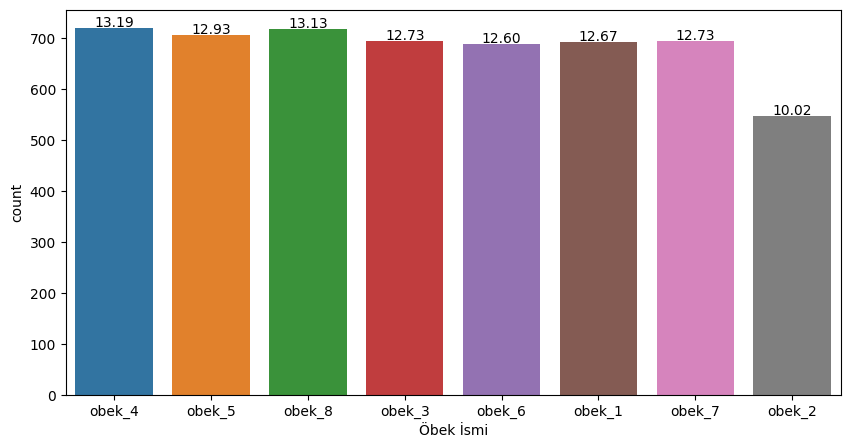

In [19]:
plt.figure(figsize=(10,5))
total = float(len(train['Öbek İsmi']) )

ax = sns.countplot(x="Öbek İsmi", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

8 farklı sınıf etiketi bulunmaktadır ve bu etiketler dengesiz bir dağılıma sahiptir. Problemimiz, dengesiz çok sınıflı sınıflandırma problemidir.

# 3.2 Sayisal Degerler 

**Histogram Grafigi**

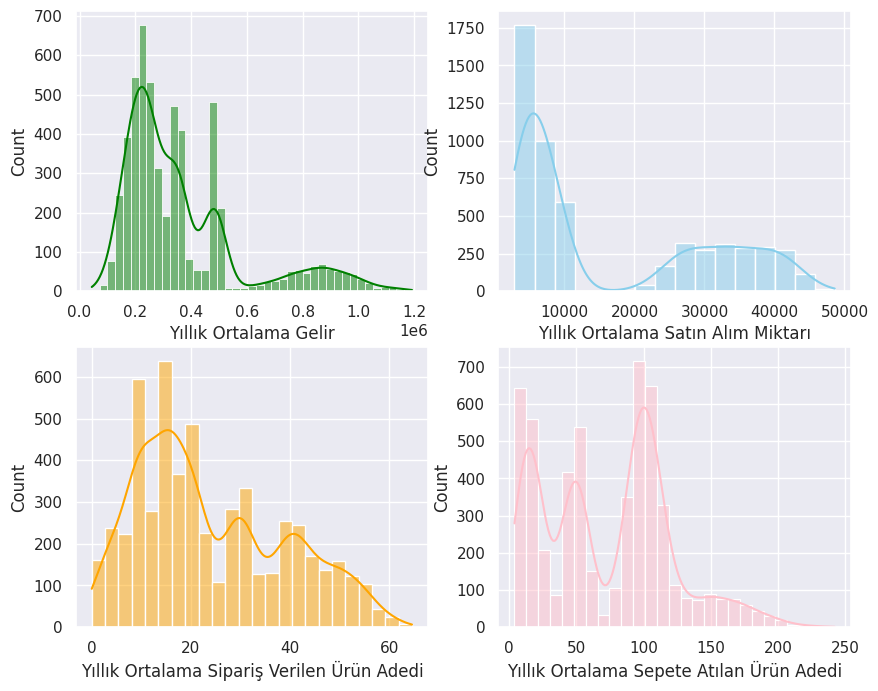

In [20]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2,2, figsize=(10, 8))

sns.histplot(data=train, x="Yıllık Ortalama Gelir", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=train, x="Yıllık Ortalama Satın Alım Miktarı", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=train, x="Yıllık Ortalama Sipariş Verilen Ürün Adedi", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=train, x="Yıllık Ortalama Sepete Atılan Ürün Adedi", kde=True, ax=axs[1, 1], color='pink');

 Grafikler, yıllık ortalama gelir, yıllık ortalama satın alım miktarı, yıllık ortalama sipariş verilen ürün sayısı ve yıllık ortalama sepete eklenen ürün sayısının yoğunluk dağılımını göstermektedir. Sol üst köşede, yıllık ortalama gelire baktığımızda, gelir dağılımının sola çarpık olduğu ve veri içinde 3 farklı normal dağılımın bulunduğu görülmektedir. Sağ üst köşede, yıllık ortalama satın alım miktarının 2 farklı dağılıma sahip olduğu görülmektedir. Sol alt köşede birçok normal dağılım bulunmaktadır. Sağ alt köşede ise 3 farklı normal dağılım bulunmaktadır. Bu 4 grafiğin genel olarak verdiği fikir, çok değişkenli bir normal dağılımın var olduğudur. Bu nedenle, veriyi normalize etmemiz gerekmektedir. 

## 3.3  Diger analizler

👉  Bu bölüm, her bir değişken için ek keşifleri gösterecektir. Ek keşifler şunlardır:

İkili analiz (kategorik ile kategorik, kategorik ile sayısal, ve sayısal ile sayısal)

Isı Haritası (Heatmap)

Sınıflandırma Etiketi Ataması

## 3.3.1 Heatmap 

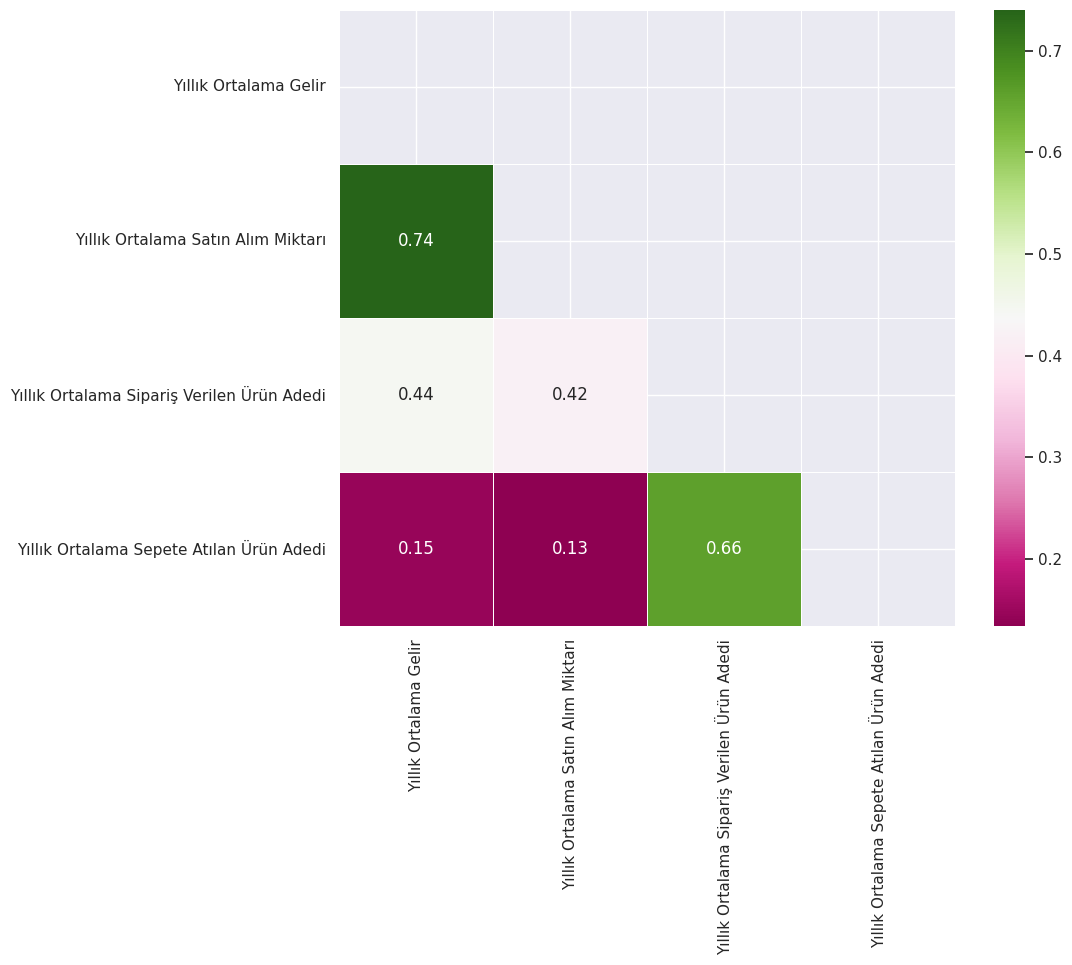

In [22]:
corr_all=train[continous_features].corr()
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (10 ,8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5,annot=True, ax = ax, cmap = "PiYG")      
plt.show()

Isı haritası (Heatmap), iki özellik arasındaki ilişkiyi gösterir ve veriyi analiz etmeye yardımcı olur. Eğer değer 1'e yakınsa, iki özelliğin pozitif bir ilişkiye sahip olduğunu söyleyebiliriz. Değer -1'e yakınsa, iki özellik arasında negatif bir ilişki vardır. Eğer değer 0'a eşitse, özellikler arasında bir ilişki bulunmamaktadır. Isı haritasına baktığımızda, Yıllık Ortalama Gelir ile Yıllık Ortalama Satın Alım Miktarı arasında pozitif bir korelasyon olduğunu açıkça görebiliriz.

## 3.3.2 Kategorik - Sayisal Veri Arasindaki iliski

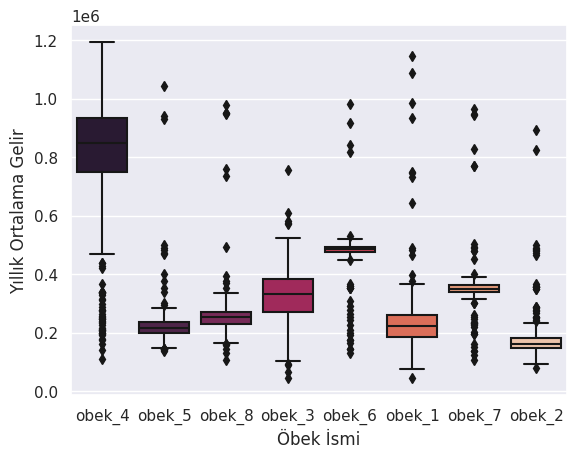

In [26]:
sns.boxplot(x="Öbek İsmi", y="Yıllık Ortalama Gelir", data=train, palette="rocket");

Yıllık ortalama gelirde birçok aykırı değer bulunduğu gorulebilir.

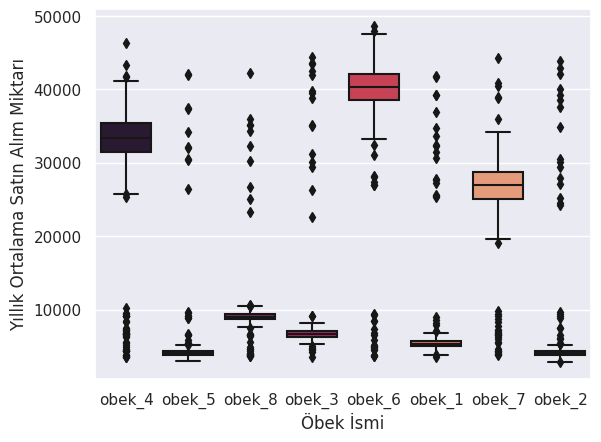

In [27]:
sns.boxplot(y="Yıllık Ortalama Satın Alım Miktarı", x="Öbek İsmi", data=train, palette="rocket");

Ortalama satın alım miktarının bir dizi aykırı değere sahip olduğu ve dağılımın pozitif çarpık olduğu açıkça görülmektedir.

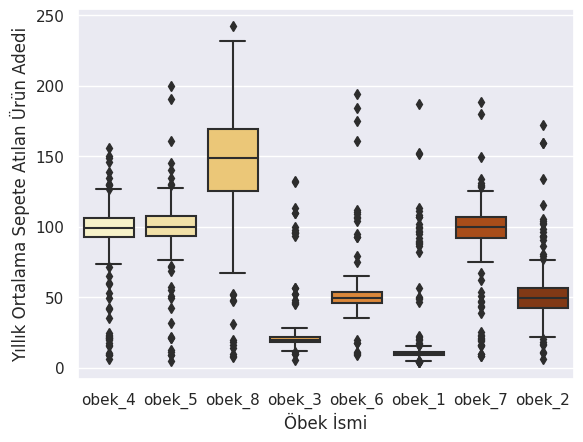

In [28]:
sns.boxplot(x="Öbek İsmi", y="Yıllık Ortalama Sepete Atılan Ürün Adedi", data=train, palette="YlOrBr");

Yıllık Ortalama Sepete Eklenen Ürün Sayısına baktığımızda, siyah noktalar gibi alanlar aykırı değerlerin bulunduğunu göstermektedir ve kutu grafiğinin her sınıflandırma etiketi için farklılık gösterdiğini söyleyebiliriz.

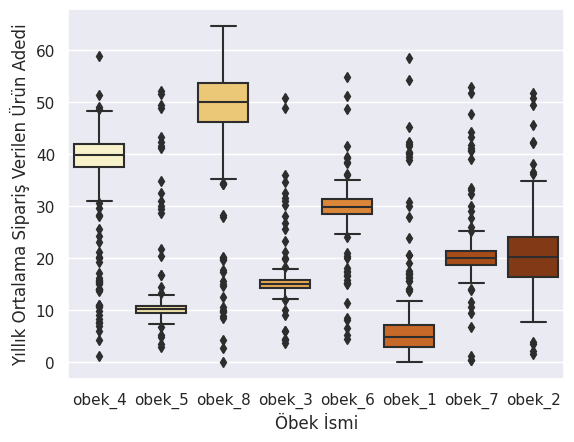

In [29]:
sns.boxplot(x="Öbek İsmi", y="Yıllık Ortalama Sipariş Verilen Ürün Adedi", data=train, palette="YlOrBr");

Yukarıdaki iki kutu grafiğinde görüldüğü gibi, birçok aykırı değer bulunmaktadır ve bu değerler pozitif bir dağılım göstermektedir.

# 3.4 Obeklerin Analizi

Bu bölümde, veri setinde 8 farklı sınıf bulunmaktadır. Her bir sınıf etiketini diğer özelliklerle birlikte analiz edeceğiz. Bu analizdeki amacımız, her sınıf etiketine anlamlı bir isim atamaktır.

## 3.4.1 Öbek 1 

In [33]:
train_öbek_1=train[train['Öbek İsmi']=='obek_1']

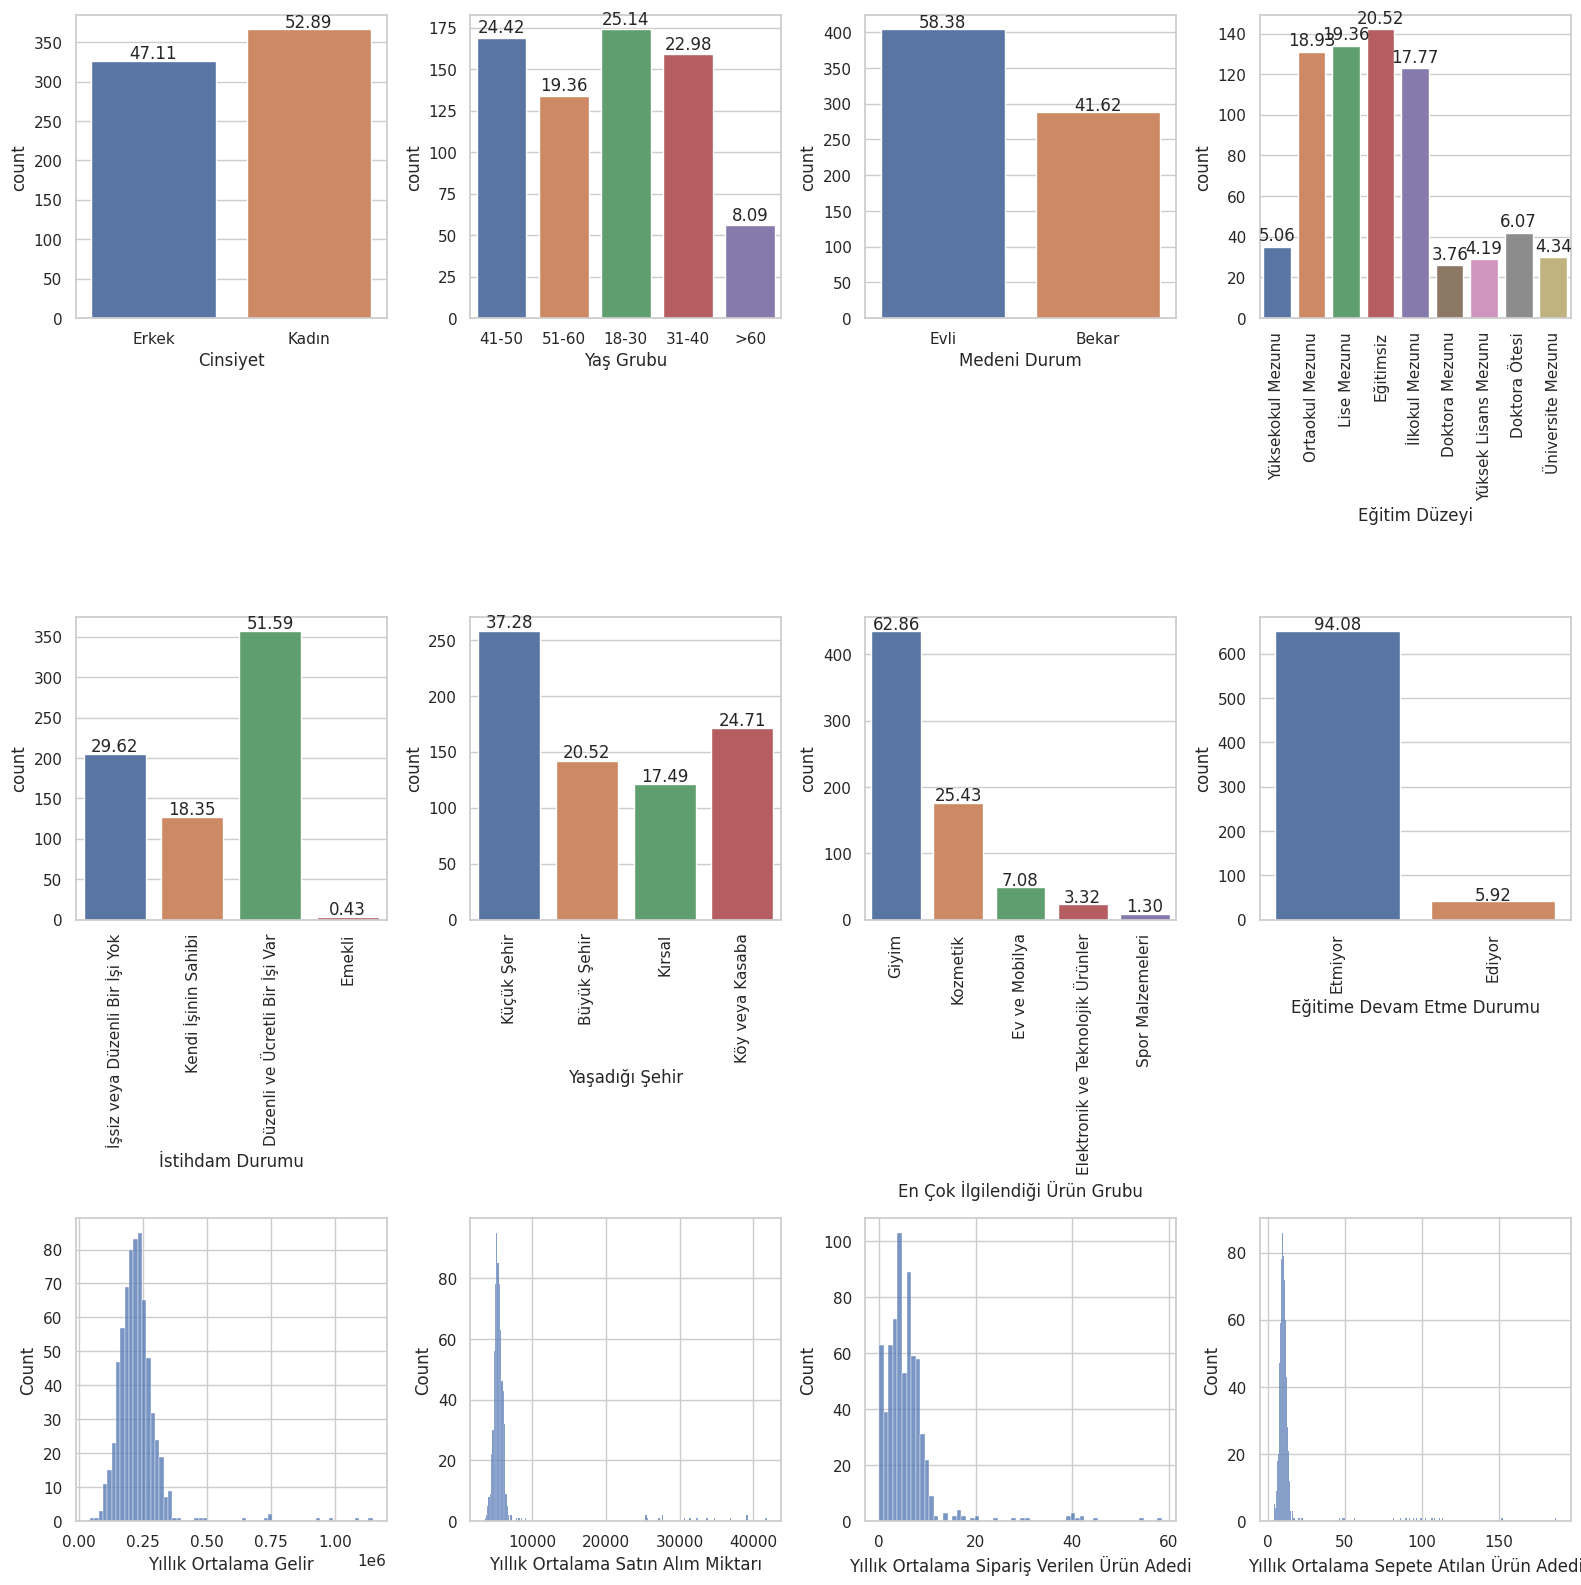

In [34]:
fig=plt.figure(figsize=(16,16))
sns.set(style="whitegrid")

fig=plt.subplot(3, 4, 1)
ax=sns.countplot(x='Cinsiyet', data=train_öbek_1)
total = float(len(train_öbek_1['Cinsiyet']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

fig=plt.subplot(3, 4, 2)
ax=sns.countplot(x='Yaş Grubu', data=train_öbek_1)
total = float(len(train_öbek_1['Yaş Grubu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(3, 4, 3)
ax=sns.countplot(x='Medeni Durum', data=train_öbek_1)
total = float(len(train_öbek_1['Medeni Durum']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(3, 4,4)
ax=sns.countplot(x='Eğitim Düzeyi', data=train_öbek_1)
plt.xticks(rotation=90)
total = float(len(train_öbek_1['Eğitim Düzeyi']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(3, 4, 5)
ax=sns.countplot(x='İstihdam Durumu', data=train_öbek_1)
plt.xticks(rotation=90)
total = float(len(train_öbek_1['İstihdam Durumu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(3, 4, 6)
ax=sns.countplot(x='Yaşadığı Şehir', data=train_öbek_1)
plt.xticks(rotation=90)
total = float(len(train_öbek_1['Yaşadığı Şehir']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(3, 4, 7)
ax=sns.countplot(x='En Çok İlgilendiği Ürün Grubu', data=train_öbek_1)
plt.xticks(rotation=90)
total = float(len(train_öbek_1['En Çok İlgilendiği Ürün Grubu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(3, 4, 8)
ax=sns.countplot(x='Eğitime Devam Etme Durumu', data=train_öbek_1)
plt.xticks(rotation=90)
total = float(len(train_öbek_1['Eğitime Devam Etme Durumu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(3, 4, 9)
sns.histplot(data=train_öbek_1, x='Yıllık Ortalama Gelir')

plt.subplot(3, 4, 10)
sns.histplot(data=train_öbek_1, x='Yıllık Ortalama Satın Alım Miktarı')

plt.subplot(3, 4, 11)
sns.histplot(data=train_öbek_1, x='Yıllık Ortalama Sipariş Verilen Ürün Adedi')

plt.subplot(3, 4,12)
sns.histplot(data=train_öbek_1, x='Yıllık Ortalama Sepete Atılan Ürün Adedi')


plt.tight_layout()
plt.show()

Bu grup %47.11 erkek ve %52.89 kadından oluşmaktadır. Tüm yaş gruplarından bireyler bulunmaktadır. 18-30 yaş aralığı %25.14, 41-50 yaş aralığı %24.42, 31-40 yaş aralığı %22.98, 51-60 yaş aralığı %19.36, ve 60 yaş üstü %8.09 oranında grubu oluşturmaktadır.

Bu grup ağırlıklı olarak evli bireylerden (%58.38) ve daha düşük eğitim seviyesine sahip kişilerden oluşmaktadır. Düzenli bir işe sahip bireylerin sayısı yüksek olmakla birlikte, işsizlik oranı da dikkat çekicidir. Bu grubun ortalama gelir seviyesi diğer gruplara kıyasla daha düşüktür. Genellikle sınırlı sayıda ürünü sepete eklemekte ve sipariş etmektedirler. En çok tercih ettikleri ürün kategorileri giyim ve kozmetiktir.

Gelir seviyelerinin sınırlı olması nedeniyle, bu gruptaki bireyler daha çok temel ihtiyaçlara odaklanmaktadır. Bu durum, sadece ihtiyaç duydukları ürünleri satın alma eğiliminde olmalarından dolayı satın alım miktarlarını azaltmaktadır. Bu bağlamda, bu grup "İhtiyaç Odaklı Yaşayanlar" olarak adlandırılabilir.

## 3.4.2 Öbek 2

In [35]:
train_öbek_2=train[train['Öbek İsmi']=='obek_2']

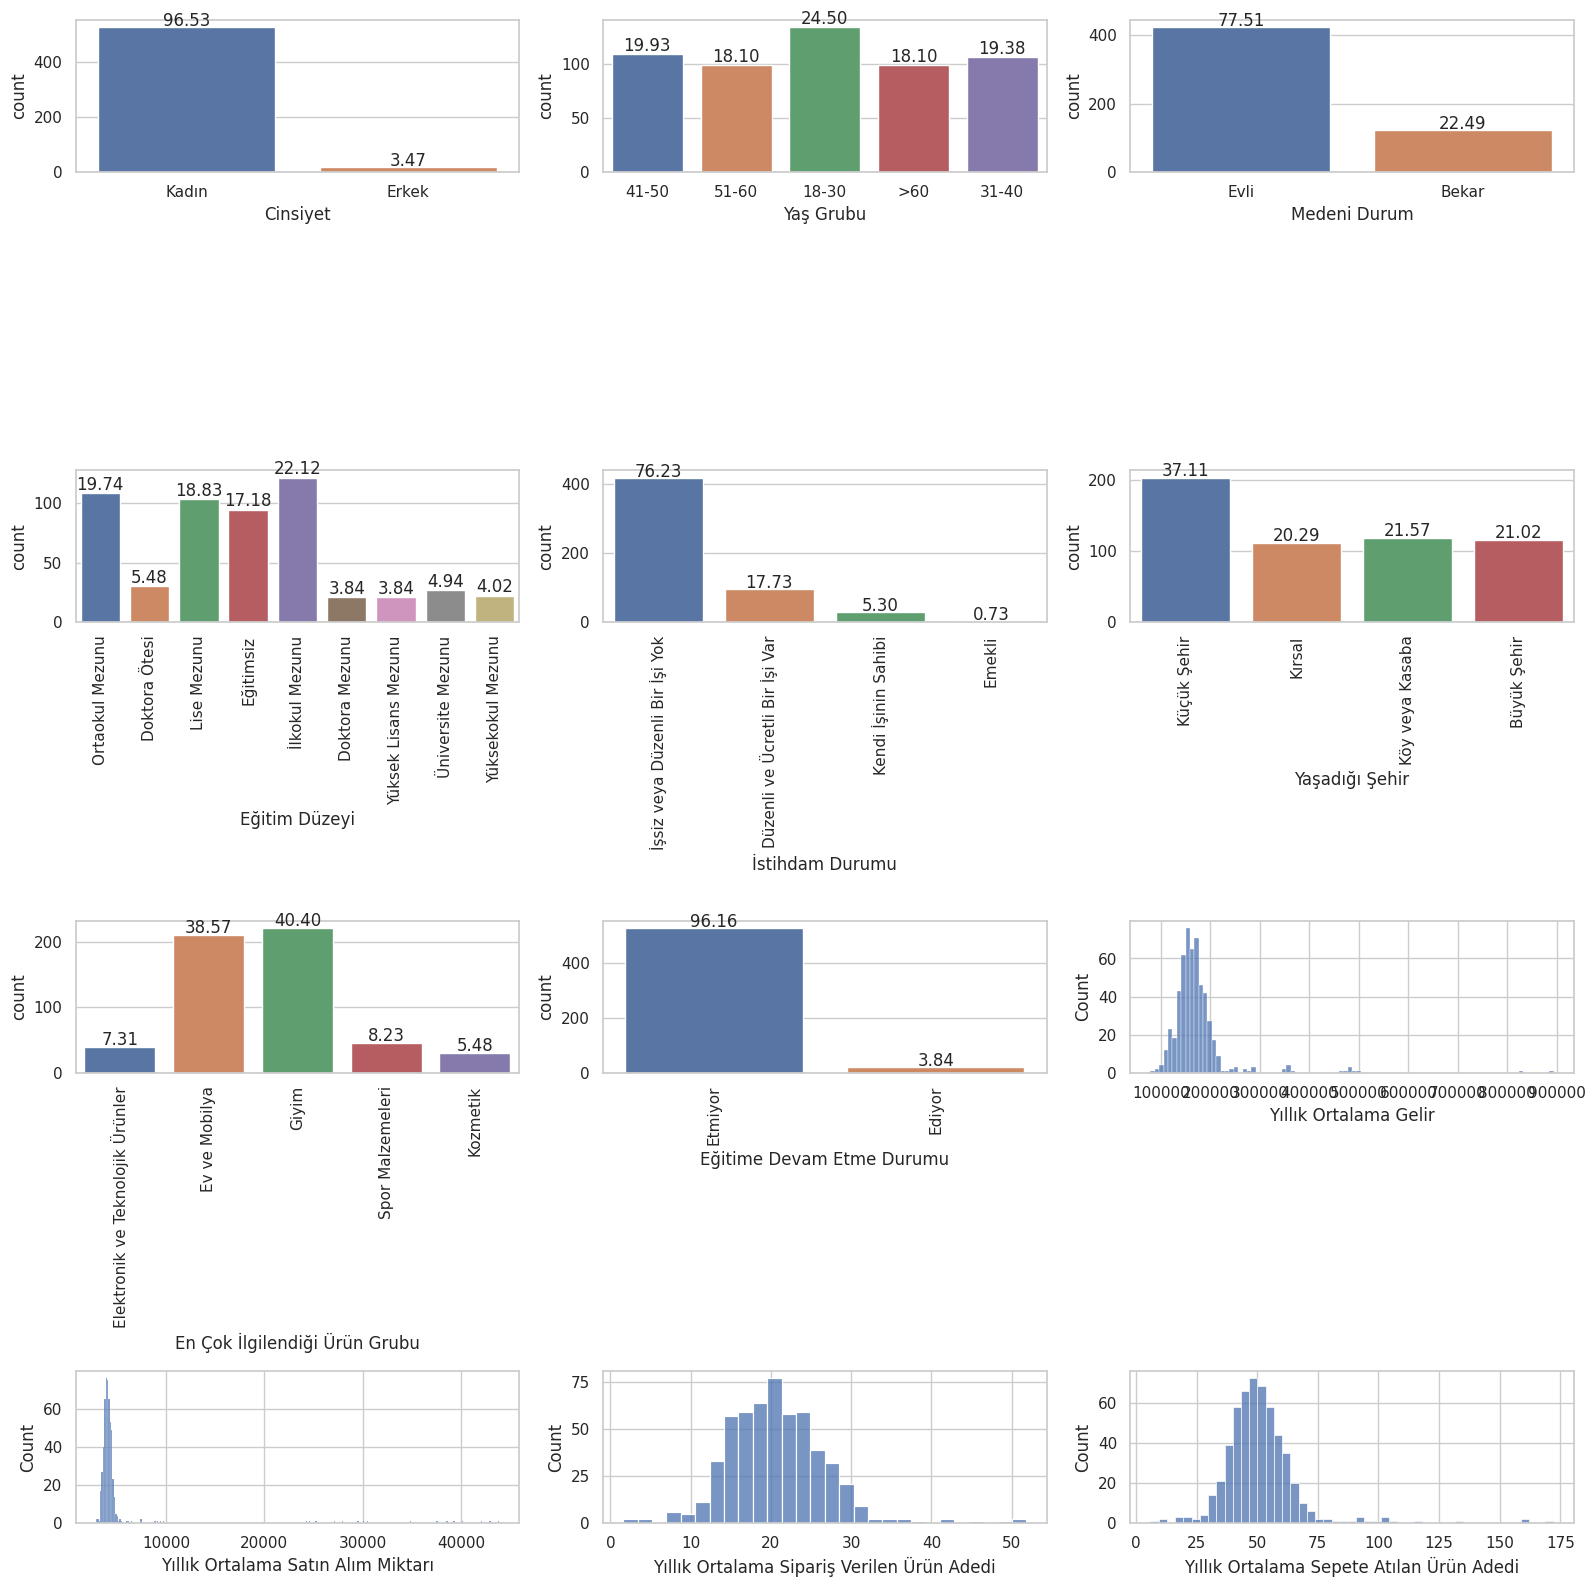

In [ ]:
fig=plt.figure(figsize=(16,16))
sns.set(style="whitegrid")

fig=plt.subplot(4, 3, 1)
ax=sns.countplot(x='Cinsiyet', data=train_öbek_2)
total = float(len(train_öbek_2['Cinsiyet']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

fig=plt.subplot(4, 3, 2)
ax=sns.countplot(x='Yaş Grubu', data=train_öbek_2)
total = float(len(train_öbek_2['Yaş Grubu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 3)
ax=sns.countplot(x='Medeni Durum', data=train_öbek_2)
total = float(len(train_öbek_2['Medeni Durum']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3,4)
ax=sns.countplot(x='Eğitim Düzeyi', data=train_öbek_2)
plt.xticks(rotation=90)
total = float(len(train_öbek_2['Eğitim Düzeyi']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 5)
ax=sns.countplot(x='İstihdam Durumu', data=train_öbek_2)
plt.xticks(rotation=90)
total = float(len(train_öbek_2['İstihdam Durumu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 6)
ax=sns.countplot(x='Yaşadığı Şehir', data=train_öbek_2)
plt.xticks(rotation=90)
total = float(len(train_öbek_2['Yaşadığı Şehir']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 7)
ax=sns.countplot(x='En Çok İlgilendiği Ürün Grubu', data=train_öbek_2)
plt.xticks(rotation=90)
total = float(len(train_öbek_2['En Çok İlgilendiği Ürün Grubu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 8)
ax=sns.countplot(x='Eğitime Devam Etme Durumu', data=train_öbek_2)
plt.xticks(rotation=90)
total = float(len(train_öbek_2['Eğitime Devam Etme Durumu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 9)
sns.histplot(data=train_öbek_2, x='Yıllık Ortalama Gelir')

plt.subplot(4, 3, 10)
sns.histplot(data=train_öbek_2, x='Yıllık Ortalama Satın Alım Miktarı')

plt.subplot(4, 3, 11)
sns.histplot(data=train_öbek_2, x='Yıllık Ortalama Sipariş Verilen Ürün Adedi')

plt.subplot(4, 3,12)
sns.histplot(data=train_öbek_2, x='Yıllık Ortalama Sepete Atılan Ürün Adedi')


plt.tight_layout()
plt.show()

Bu grubu oluşturanların çoğunluğu kadınlardan oluşmaktadır ve kadın oranı %96.53'e ulaşmaktadır. Bu kadınların büyük bir kısmı (%77.51) evlidir. Eğitim seviyeleri genellikle düşüktür ve istihdam edilmemişlerdir; işsizlik oranı yüksektir. Grubun %37.11'ini küçük kasabalarda yaşayan bireyler oluşturmaktadır. En çok ilgi gösterdikleri ürün kategorisi %40.40 ile giyimdir, bunu %38.57 ile ev ve mobilya ürünleri takip etmektedir.

Bu grubun yıllık ortalama gelir seviyeleri ve satın alma miktarları oldukça sınırlıdır. Bu grubu diğerlerinden ayıran belirgin bir özellik, çoğunluğunun eğitimsiz ve işsiz kadınlardan oluşmasıdır. Bu nedenle, bu grup, genellikle toplum tarafından göz ardı edilen ancak ev işlerine önemli katkılarda bulunan kadınlara bir saygı duruşu niteliğinde, "Görünmez Emekçiler" olarak adlandırılabilir.

## 3.4.3 Öbek 3 

In [37]:
train_öbek_3=train[train['Öbek İsmi']=='obek_3']

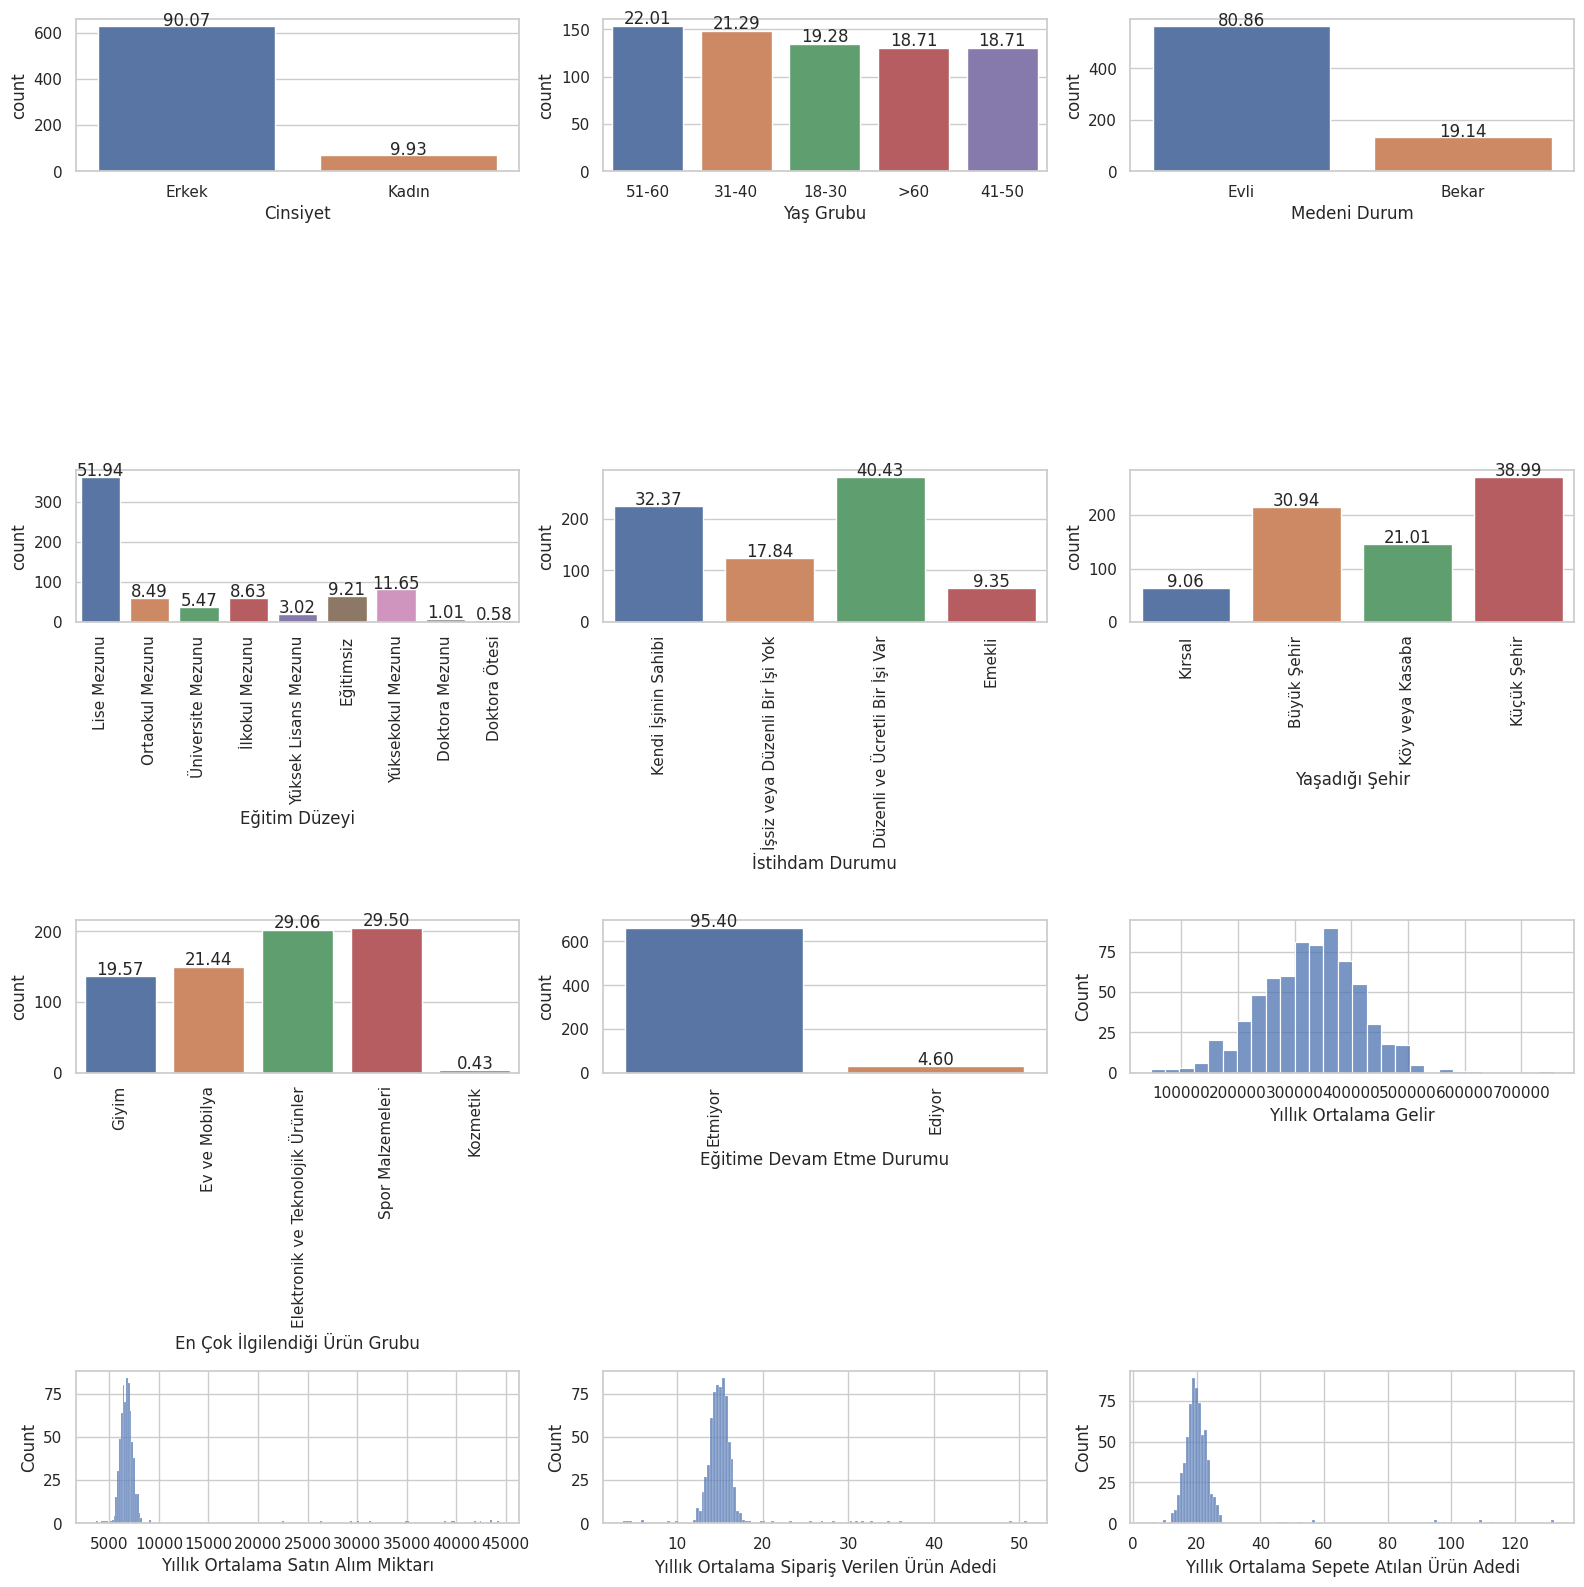

In [38]:
fig=plt.figure(figsize=(16,16))
sns.set(style="whitegrid")

fig=plt.subplot(4, 3, 1)
ax=sns.countplot(x='Cinsiyet', data=train_öbek_3)
total = float(len(train_öbek_3['Cinsiyet']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

fig=plt.subplot(4, 3, 2)
ax=sns.countplot(x='Yaş Grubu', data=train_öbek_3)
total = float(len(train_öbek_3['Yaş Grubu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 3)
ax=sns.countplot(x='Medeni Durum', data=train_öbek_3)
total = float(len(train_öbek_3['Medeni Durum']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3,4)
ax=sns.countplot(x='Eğitim Düzeyi', data=train_öbek_3)
plt.xticks(rotation=90)
total = float(len(train_öbek_3['Eğitim Düzeyi']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 5)
ax=sns.countplot(x='İstihdam Durumu', data=train_öbek_3)
plt.xticks(rotation=90)
total = float(len(train_öbek_3['İstihdam Durumu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 6)
ax=sns.countplot(x='Yaşadığı Şehir', data=train_öbek_3)
plt.xticks(rotation=90)
total = float(len(train_öbek_3['Yaşadığı Şehir']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 7)
ax=sns.countplot(x='En Çok İlgilendiği Ürün Grubu', data=train_öbek_3)
plt.xticks(rotation=90)
total = float(len(train_öbek_3['En Çok İlgilendiği Ürün Grubu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 8)
ax=sns.countplot(x='Eğitime Devam Etme Durumu', data=train_öbek_3)
plt.xticks(rotation=90)
total = float(len(train_öbek_3['Eğitime Devam Etme Durumu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 9)
sns.histplot(data=train_öbek_3, x='Yıllık Ortalama Gelir')

plt.subplot(4, 3, 10)
sns.histplot(data=train_öbek_3, x='Yıllık Ortalama Satın Alım Miktarı')

plt.subplot(4, 3, 11)
sns.histplot(data=train_öbek_3, x='Yıllık Ortalama Sipariş Verilen Ürün Adedi')

plt.subplot(4, 3,12)
sns.histplot(data=train_öbek_3, x='Yıllık Ortalama Sepete Atılan Ürün Adedi')


plt.tight_layout()
plt.show()

Bu grubu oluşturan bireylerin %90.07'si erkeklerden oluşmaktadır. Farklı yaş gruplarını kapsayan bir dağılım söz konusudur. Bu grup içinde bireylerin %80.86'sı evlidir, bu da yüksek bir evlilik oranını göstermektedir. Eğitim düzeyine baktığımızda, katılımcıların %51.94'ü lise mezunudur. İstihdam durumuna göre, bu grubun önemli bir kısmı düzenli ve maaşlı işlerde çalışan bireylerden oluşmaktadır. Bu topluluğun en çok ilgilendiği alanlar spor malzemeleri, elektronik ve teknolojik ürünlerdir.

Yıllık ortalama gelirleri yüksek olmasına rağmen, bu gruptaki bireylerin satın alma değerleri düşük seviyededir. Sipariş edilen ürün sayısı ile sepete eklenen ürün sayısı birbirine yakın oranlardadır. Bu verilere dayanarak, bu grubun en belirgin özelliği evli erkeklerden oluşmasıdır ve gelirlerine rağmen satın alma miktarlarının sınırlı olmasıdır. Bu grubu "Finansal Denge Ustaları" olarak adlandırıyorum, çünkü evlilik ve ekonomik istikrarı göz önünde bulundurarak dengeli bir yaşam tarzı benimsediklerini düşünüyorum.

## 3.4.4 Öbek 4

In [39]:
train_öbek_4=train[train['Öbek İsmi']=='obek_4']

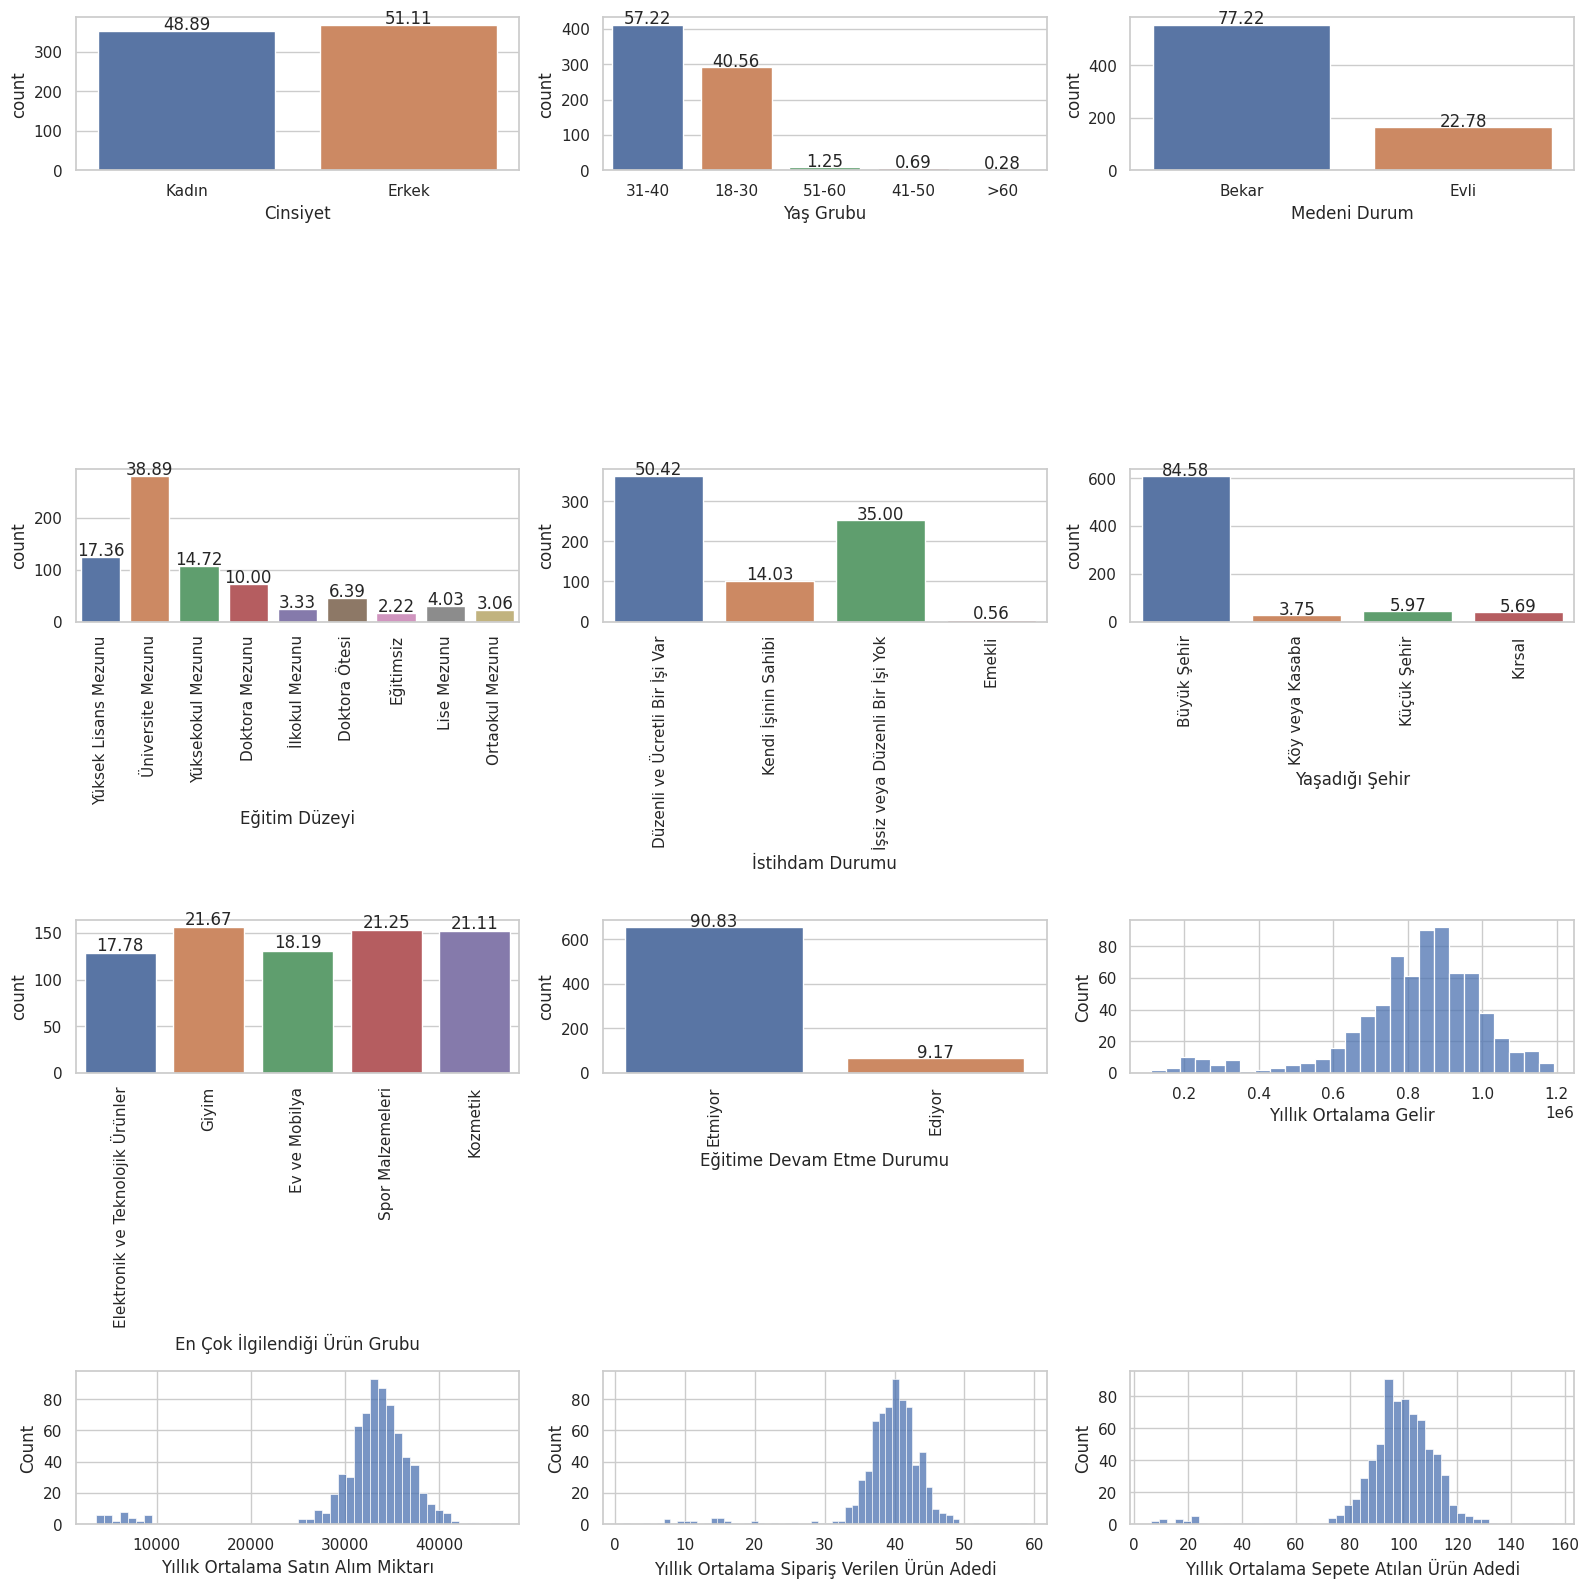

In [40]:
fig=plt.figure(figsize=(16,16))
sns.set(style="whitegrid")

fig=plt.subplot(4, 3, 1)
ax=sns.countplot(x='Cinsiyet', data=train_öbek_4)
total = float(len(train_öbek_4['Cinsiyet']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

fig=plt.subplot(4, 3, 2)
ax=sns.countplot(x='Yaş Grubu', data=train_öbek_4)
total = float(len(train_öbek_4['Yaş Grubu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 3)
ax=sns.countplot(x='Medeni Durum', data=train_öbek_4)
total = float(len(train_öbek_4['Medeni Durum']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3,4)
ax=sns.countplot(x='Eğitim Düzeyi', data=train_öbek_4)
plt.xticks(rotation=90)
total = float(len(train_öbek_4['Eğitim Düzeyi']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 5)
ax=sns.countplot(x='İstihdam Durumu', data=train_öbek_4)
plt.xticks(rotation=90)
total = float(len(train_öbek_4['İstihdam Durumu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 6)
ax=sns.countplot(x='Yaşadığı Şehir', data=train_öbek_4)
plt.xticks(rotation=90)
total = float(len(train_öbek_4['Yaşadığı Şehir']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 7)
ax=sns.countplot(x='En Çok İlgilendiği Ürün Grubu', data=train_öbek_4)
plt.xticks(rotation=90)
total = float(len(train_öbek_4['En Çok İlgilendiği Ürün Grubu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 8)
ax=sns.countplot(x='Eğitime Devam Etme Durumu', data=train_öbek_4)
plt.xticks(rotation=90)
total = float(len(train_öbek_4['Eğitime Devam Etme Durumu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 9)
sns.histplot(data=train_öbek_4, x='Yıllık Ortalama Gelir')

plt.subplot(4, 3, 10)
sns.histplot(data=train_öbek_4, x='Yıllık Ortalama Satın Alım Miktarı')

plt.subplot(4, 3, 11)
sns.histplot(data=train_öbek_4, x='Yıllık Ortalama Sipariş Verilen Ürün Adedi')

plt.subplot(4, 3,12)
sns.histplot(data=train_öbek_4, x='Yıllık Ortalama Sepete Atılan Ürün Adedi')


plt.tight_layout()
plt.show()

Bu grubu oluşturan bireylerin %48.89'u kadın, %51.11'i erkektir. Yaş grubu genellikle 31-40 aralığında yoğunlaşmıştır ve bu grup içinde bireylerin %77.22'si bekardır. Katılımcıların eğitim düzeyi üniversite mezunu olarak belirlenmiştir. İstihdam durumuna baktığımızda, bireylerin %50.42'sinin düzenli ve maaşlı işlerde çalıştığı, ancak işsizlik oranının da yüksek olduğu görülmektedir.

Bu gruptaki bireyler genellikle büyük şehirlerde yaşamakta, hem yüksek gelir hem de yüksek satın alma miktarına sahiptirler. Sipariş edilen ürün sayısı ile sepete eklenen ürün sayısı arasında doğrudan bir ilişki vardır ve bu miktarlar yüksek seviyelerdedir. Bu verilere dayanarak, ekonomik zorluk yaşamayan ve çeşitli ürün kategorilerine kolay erişimi olan bir kesimi yansıttığını düşündüğüm için bu grubu "Bolluk İçinde Yaşayanlar" olarak adlandırıyorum.

## 3.4.5 Öbek 5

In [41]:
train_öbek_5=train[train['Öbek İsmi']=='obek_5']

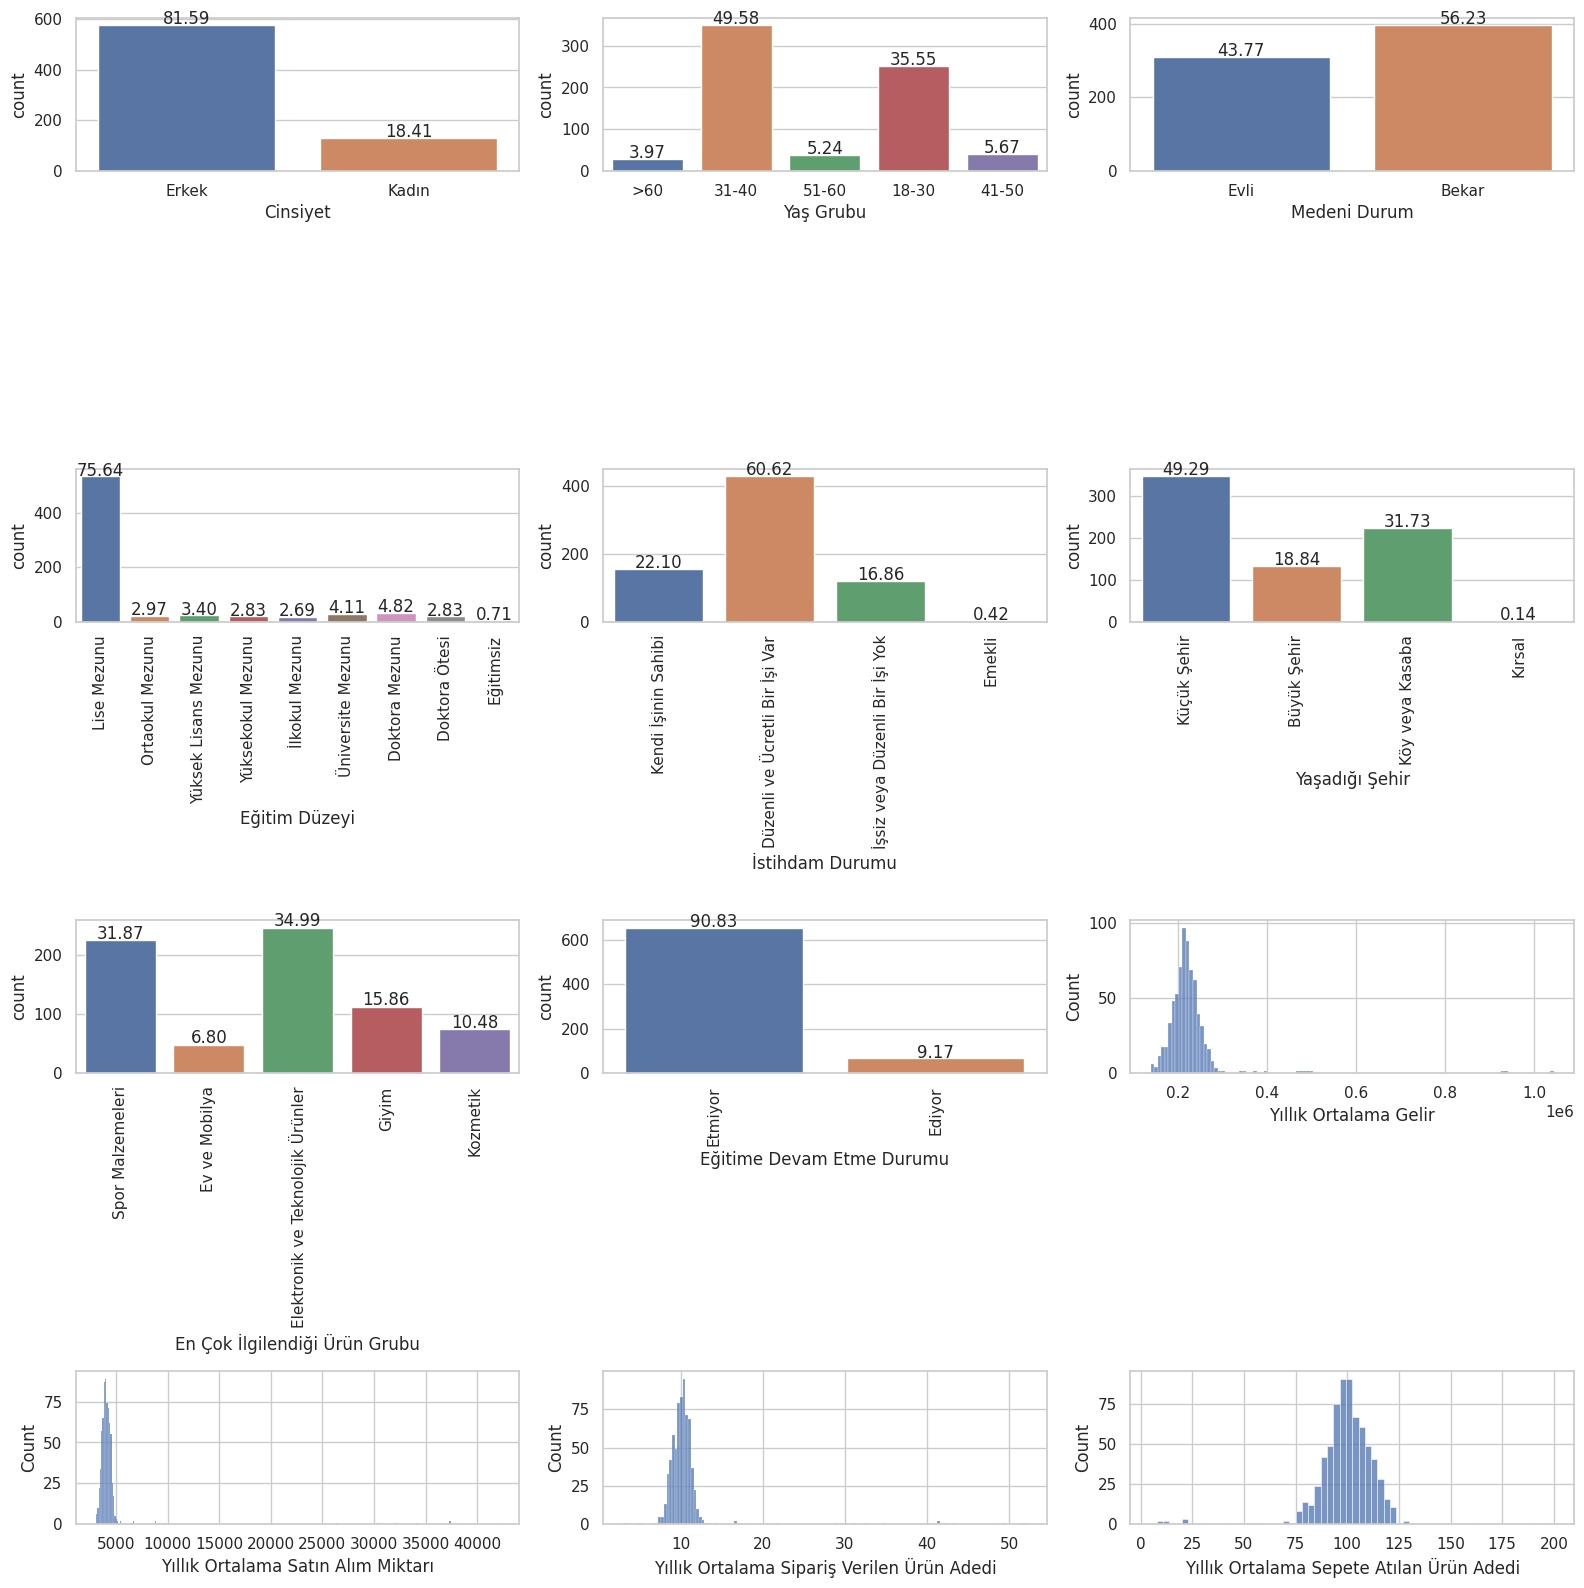

In [42]:
fig=plt.figure(figsize=(16,16))
sns.set(style="whitegrid")

fig=plt.subplot(4, 3, 1)
ax=sns.countplot(x='Cinsiyet', data=train_öbek_5)
total = float(len(train_öbek_5['Cinsiyet']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

fig=plt.subplot(4, 3, 2)
ax=sns.countplot(x='Yaş Grubu', data=train_öbek_5)
total = float(len(train_öbek_5['Yaş Grubu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 3)
ax=sns.countplot(x='Medeni Durum', data=train_öbek_5)
total = float(len(train_öbek_5['Medeni Durum']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3,4)
ax=sns.countplot(x='Eğitim Düzeyi', data=train_öbek_5)
plt.xticks(rotation=90)
total = float(len(train_öbek_5['Eğitim Düzeyi']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 5)
ax=sns.countplot(x='İstihdam Durumu', data=train_öbek_5)
plt.xticks(rotation=90)
total = float(len(train_öbek_5['İstihdam Durumu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 6)
ax=sns.countplot(x='Yaşadığı Şehir', data=train_öbek_5)
plt.xticks(rotation=90)
total = float(len(train_öbek_5['Yaşadığı Şehir']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 7)
ax=sns.countplot(x='En Çok İlgilendiği Ürün Grubu', data=train_öbek_5)
plt.xticks(rotation=90)
total = float(len(train_öbek_5['En Çok İlgilendiği Ürün Grubu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 8)
ax=sns.countplot(x='Eğitime Devam Etme Durumu', data=train_öbek_4)
plt.xticks(rotation=90)
total = float(len(train_öbek_4['Eğitime Devam Etme Durumu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 9)
sns.histplot(data=train_öbek_5, x='Yıllık Ortalama Gelir')

plt.subplot(4, 3, 10)
sns.histplot(data=train_öbek_5, x='Yıllık Ortalama Satın Alım Miktarı')

plt.subplot(4, 3, 11)
sns.histplot(data=train_öbek_5, x='Yıllık Ortalama Sipariş Verilen Ürün Adedi')

plt.subplot(4, 3,12)
sns.histplot(data=train_öbek_5, x='Yıllık Ortalama Sepete Atılan Ürün Adedi')


plt.tight_layout()
plt.show()

Bu grubu oluşturan bireylerin çoğunluğu (%81.59) erkektir. Bu bireyler genellikle 18-40 yaş aralığındadır ve %56.23'ü bekârdır. Eğitim düzeyleri incelendiğinde, %75.64'ünün lise mezunu olduğu görülmektedir. İstihdam durumuna baktığımızda, %60.62'si düzenli ve maaşlı işlerde çalışmakta olup, genellikle küçük kasabalarda yaşamaktadırlar. Bu grubun en çok ilgilendiği ürün kategorileri spor malzemeleri, elektronik ve teknolojik ürünlerdir.

Yıllık ortalama gelirleri ve satın alma miktarları düşük seviyededir. Az sayıda ürün sipariş etmelerine rağmen, sepete daha fazla ürün eklemektedirler. Bu grubun en belirgin özelliği, genellikle mavi yakalı çalışanlar olarak bilinen çalışan erkek modelini temsil etmeleridir. Bu nedenle, bu grubun azimli ve kararlı doğasını yansıttığını düşündüğüm için onları "Mücadeleci Ruha Sahip Olanlar" olarak adlandırıyorum.

## 3.4.6 Öbek 6

In [43]:
train_öbek_6=train[train['Öbek İsmi']=='obek_6']

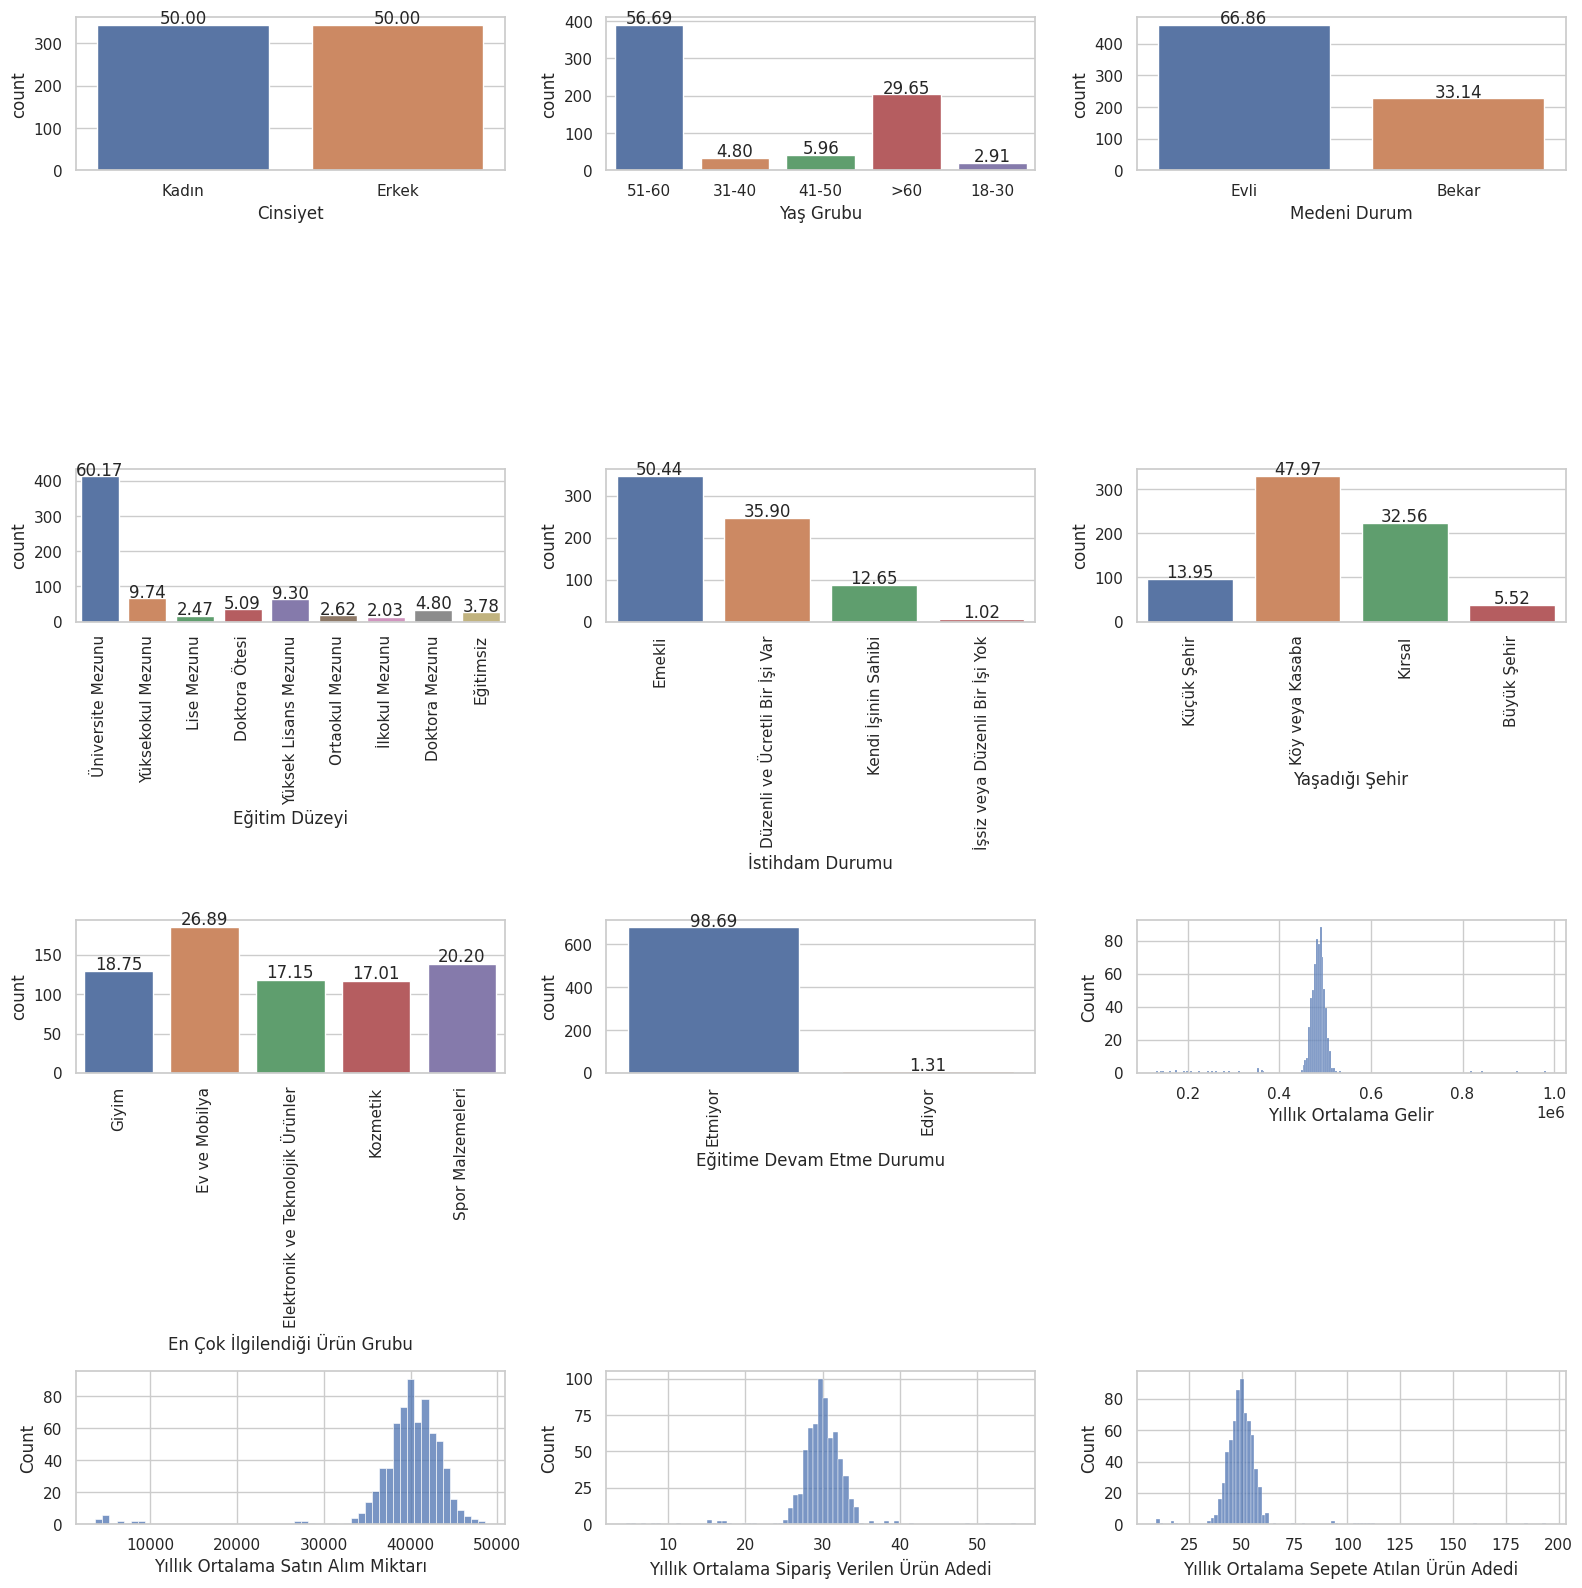

In [44]:
fig=plt.figure(figsize=(16,16))
sns.set(style="whitegrid")

fig=plt.subplot(4, 3, 1)
ax=sns.countplot(x='Cinsiyet', data=train_öbek_6)
total = float(len(train_öbek_6['Cinsiyet']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

fig=plt.subplot(4, 3, 2)
ax=sns.countplot(x='Yaş Grubu', data=train_öbek_6)
total = float(len(train_öbek_6['Yaş Grubu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 3)
ax=sns.countplot(x='Medeni Durum', data=train_öbek_6)
total = float(len(train_öbek_6['Medeni Durum']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3,4)
ax=sns.countplot(x='Eğitim Düzeyi', data=train_öbek_6)
plt.xticks(rotation=90)
total = float(len(train_öbek_6['Eğitim Düzeyi']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 5)
ax=sns.countplot(x='İstihdam Durumu', data=train_öbek_6)
plt.xticks(rotation=90)
total = float(len(train_öbek_6['İstihdam Durumu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 6)
ax=sns.countplot(x='Yaşadığı Şehir', data=train_öbek_6)
plt.xticks(rotation=90)
total = float(len(train_öbek_6['Yaşadığı Şehir']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 7)
ax=sns.countplot(x='En Çok İlgilendiği Ürün Grubu', data=train_öbek_6)
plt.xticks(rotation=90)
total = float(len(train_öbek_6['En Çok İlgilendiği Ürün Grubu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 8)
ax=sns.countplot(x='Eğitime Devam Etme Durumu', data=train_öbek_6)
plt.xticks(rotation=90)
total = float(len(train_öbek_6['Eğitime Devam Etme Durumu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 9)
sns.histplot(data=train_öbek_6, x='Yıllık Ortalama Gelir')

plt.subplot(4, 3, 10)
sns.histplot(data=train_öbek_6, x='Yıllık Ortalama Satın Alım Miktarı')

plt.subplot(4, 3, 11)
sns.histplot(data=train_öbek_6, x='Yıllık Ortalama Sipariş Verilen Ürün Adedi')

plt.subplot(4, 3,12)
sns.histplot(data=train_öbek_6, x='Yıllık Ortalama Sepete Atılan Ürün Adedi')


plt.tight_layout()
plt.show()

Bu grubu oluşturan bireyler arasında kadınlar ve erkekler eşit şekilde temsil edilmektedir. Ayrıca, bu grubun bir parçası olan bireyler arasında 51 yaş ve üzerindeki kişiler bulunmaktadır ve grubun %66.86'sı evlidir. Üniversite eğitimi almış bireyler genellikle emekli durumdadır. Yıllık ortalama gelirleri normal seviyelerde olmasına rağmen, satın alma miktarları oldukça yüksektir. Hem sipariş edilen ürün sayısı hem de sepete eklenen ürün sayısı büyük miktarlardadır.

Bu grubun en belirgin özelliği, yaşlı yaş grubuna ve emeklilere odaklanmasıdır. Bu nedenle, bu gruba "Hayatın Tadını Çıkaranlar" ismini vermeyi uygun bulduk.

## 3.4.7 Öbek 7

In [45]:
train_öbek_7=train[train['Öbek İsmi']=='obek_7']

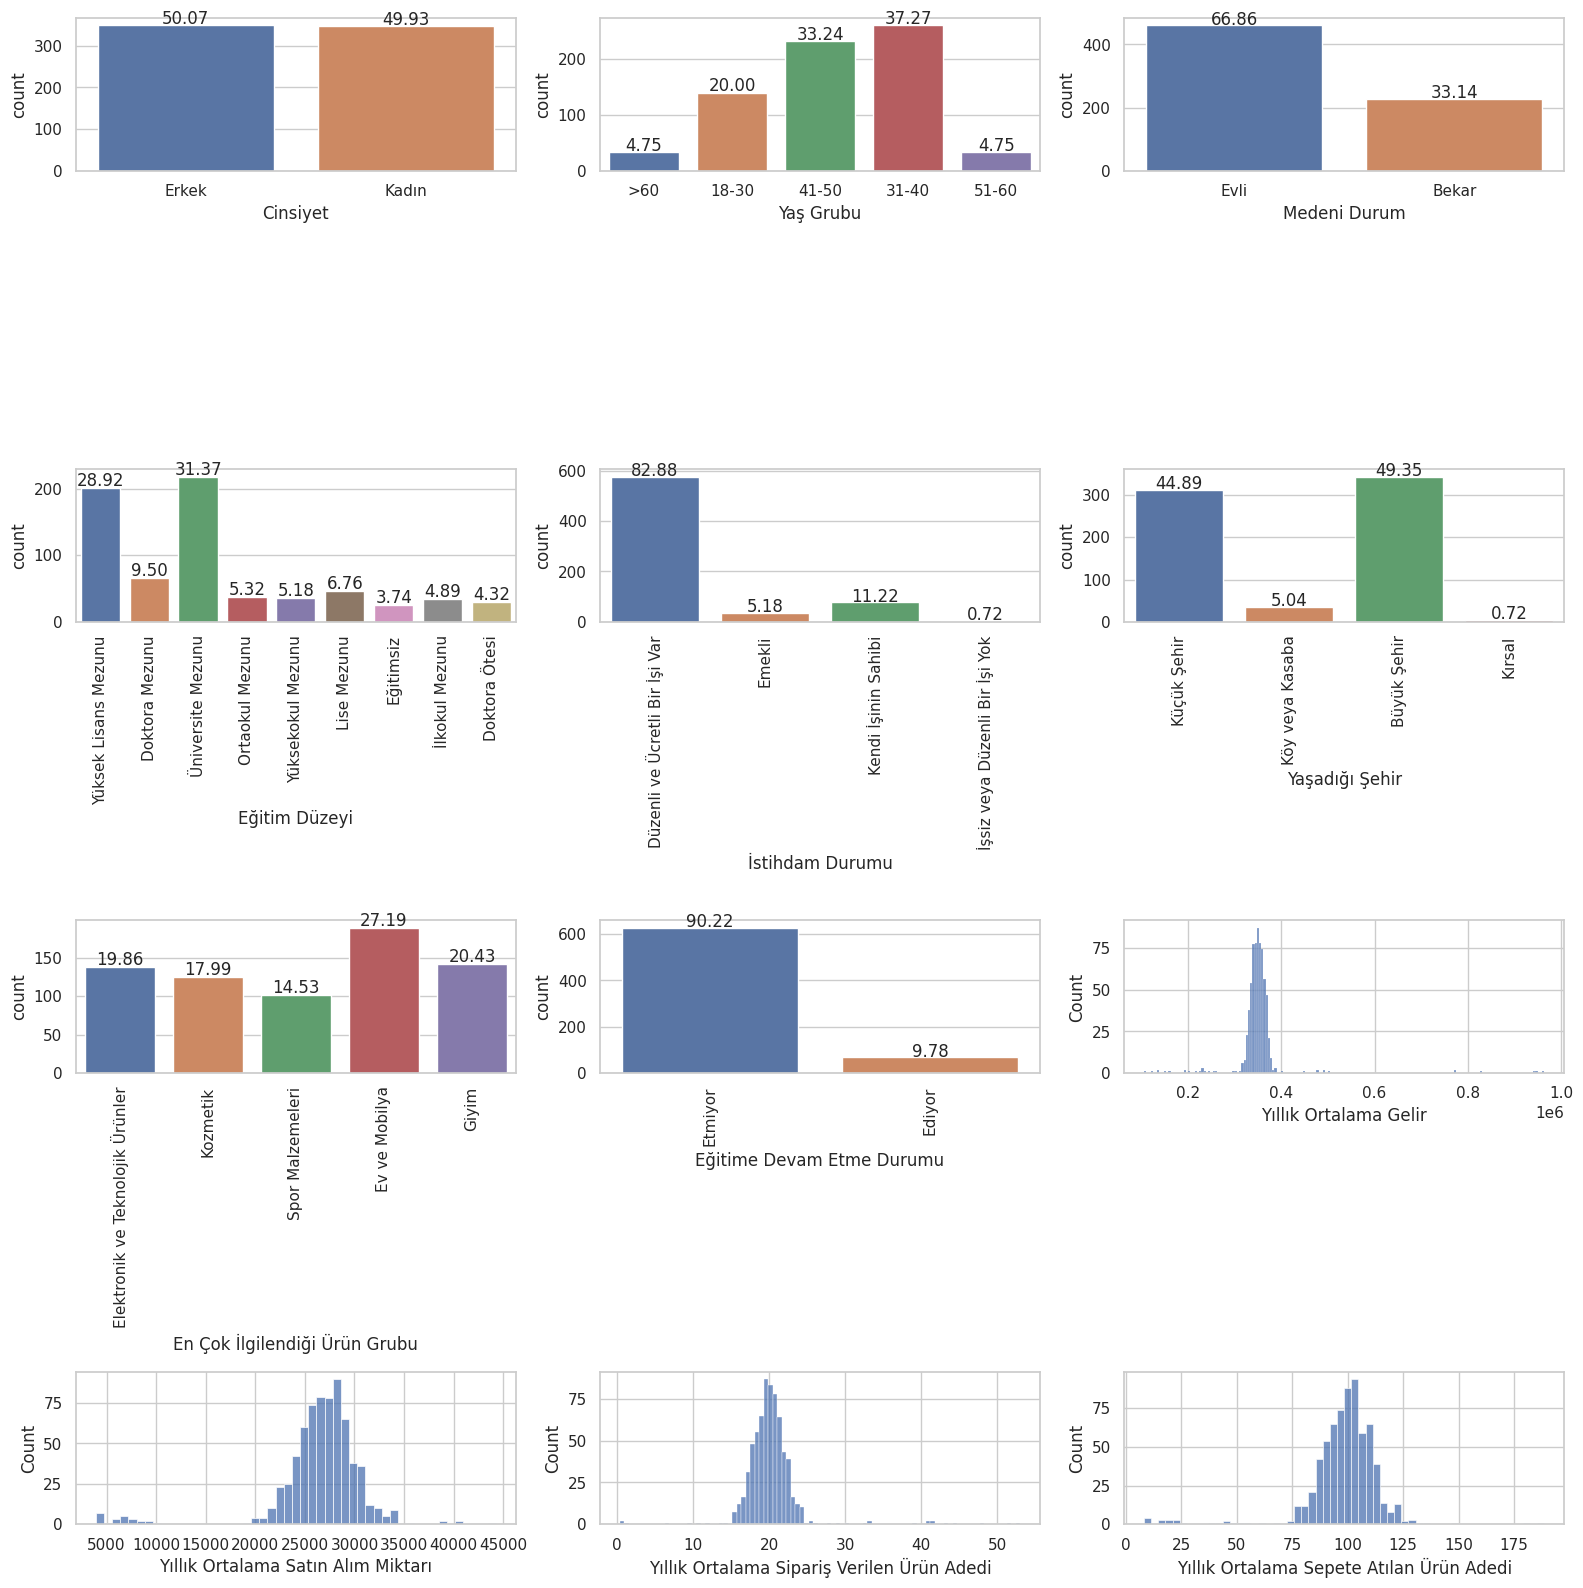

In [46]:
fig=plt.figure(figsize=(16,16))
sns.set(style="whitegrid")

fig=plt.subplot(4, 3, 1)
ax=sns.countplot(x='Cinsiyet', data=train_öbek_7)
total = float(len(train_öbek_7['Cinsiyet']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

fig=plt.subplot(4, 3, 2)
ax=sns.countplot(x='Yaş Grubu', data=train_öbek_7)
total = float(len(train_öbek_7['Yaş Grubu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 3)
ax=sns.countplot(x='Medeni Durum', data=train_öbek_6)
total = float(len(train_öbek_6['Medeni Durum']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3,4)
ax=sns.countplot(x='Eğitim Düzeyi', data=train_öbek_7)
plt.xticks(rotation=90)
total = float(len(train_öbek_7['Eğitim Düzeyi']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 5)
ax=sns.countplot(x='İstihdam Durumu', data=train_öbek_7)
plt.xticks(rotation=90)
total = float(len(train_öbek_7['İstihdam Durumu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 6)
ax=sns.countplot(x='Yaşadığı Şehir', data=train_öbek_7)
plt.xticks(rotation=90)
total = float(len(train_öbek_7['Yaşadığı Şehir']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 7)
ax=sns.countplot(x='En Çok İlgilendiği Ürün Grubu', data=train_öbek_7)
plt.xticks(rotation=90)
total = float(len(train_öbek_7['En Çok İlgilendiği Ürün Grubu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 8)
ax=sns.countplot(x='Eğitime Devam Etme Durumu', data=train_öbek_7)
plt.xticks(rotation=90)
total = float(len(train_öbek_7['Eğitime Devam Etme Durumu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 9)
sns.histplot(data=train_öbek_7, x='Yıllık Ortalama Gelir')

plt.subplot(4, 3, 10)
sns.histplot(data=train_öbek_7, x='Yıllık Ortalama Satın Alım Miktarı')

plt.subplot(4, 3, 11)
sns.histplot(data=train_öbek_7, x='Yıllık Ortalama Sipariş Verilen Ürün Adedi')

plt.subplot(4, 3,12)
sns.histplot(data=train_öbek_7, x='Yıllık Ortalama Sepete Atılan Ürün Adedi')


plt.tight_layout()
plt.show()

Kadın ve erkek bireylerden oluşan bu grup, cinsiyet açısından dengeli bir dağılım sergilemektedir. Ağırlıklı olarak 18-50 yaş aralığındaki bireylerden oluşan bu grup, evli kişilerle karakterize edilmektedir. Üniversite ve lisansüstü derecelere sahip bireylerden oluşan bu grupta, %82.88 oranında düzenli maaşlı işlerde çalışan bireyler bulunmaktadır. Bu kişiler, yoğun olarak büyük ve küçük şehirlerde yaşamaktadır ve ev ile mobilya ürünlerine yüksek ilgi göstermektedir.

Yıllık ortalama gelirleri genel ortalamaya uygun olsa da, dikkat çekici derecede yüksek satın alma miktarları öne çıkmaktadır. Sepete eklenen ürün sayısı fazla olmasına rağmen, sipariş edilen ürün sayısı daha düşüktür. Bu grubun en belirgin özelliği, eğitimli geçmişleri ve istikrarlı profesyonel kariyerleridir. Bu nedenle, bu grubu beyaz yakalı çalışanları temsil eden "Ofis Elitleri" olarak adlandırdım.

## 3.4.8 Öbek 8 

In [47]:
train_öbek_8=train[train['Öbek İsmi']=='obek_8']

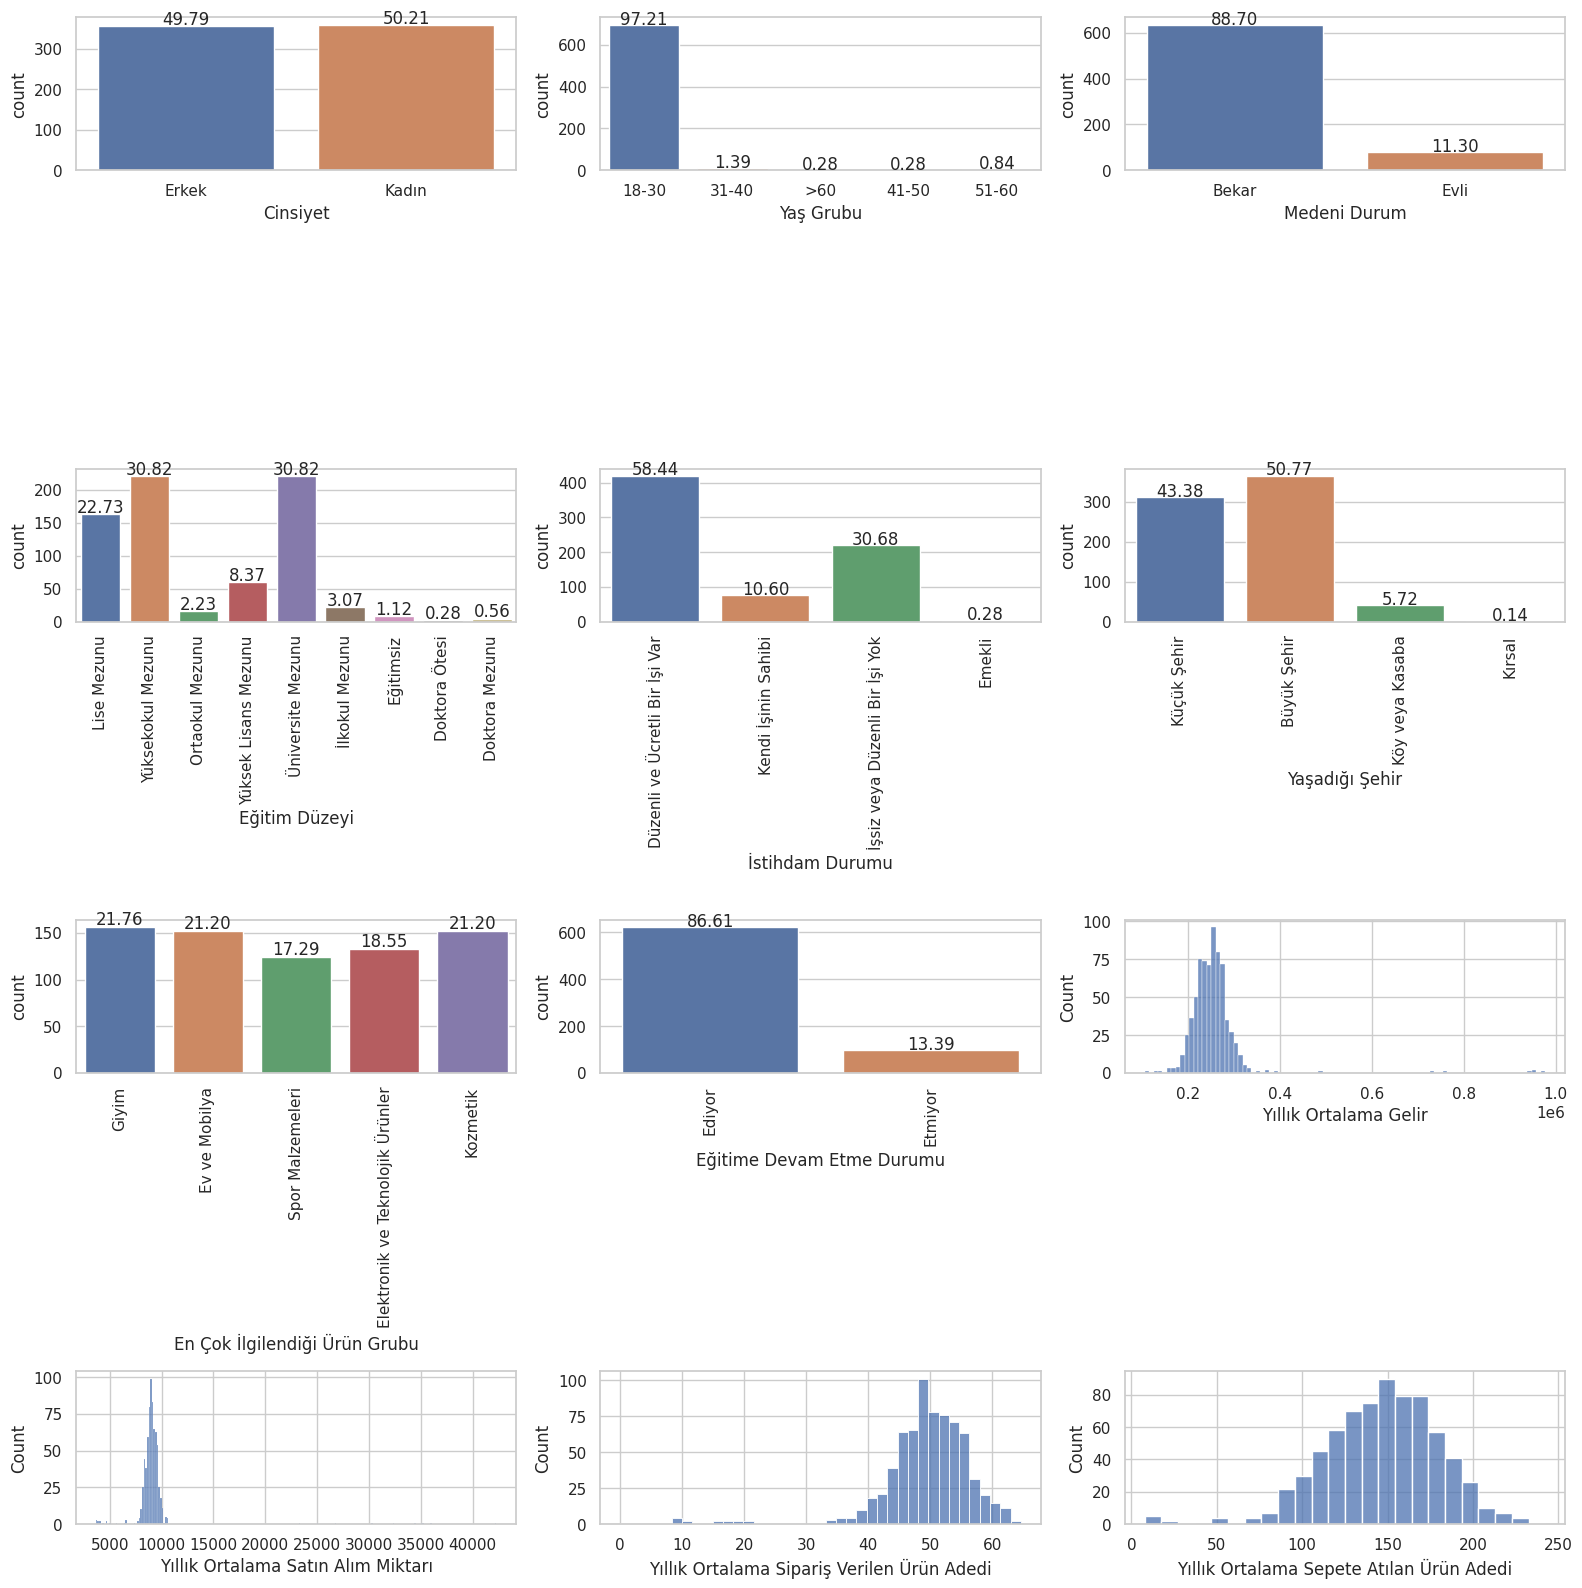

In [48]:
fig=plt.figure(figsize=(16,16))
sns.set(style="whitegrid")

fig=plt.subplot(4, 3, 1)
ax=sns.countplot(x='Cinsiyet', data=train_öbek_8)
total = float(len(train_öbek_8['Cinsiyet']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

fig=plt.subplot(4, 3, 2)
ax=sns.countplot(x='Yaş Grubu', data=train_öbek_8)
total = float(len(train_öbek_8['Yaş Grubu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 3)
ax=sns.countplot(x='Medeni Durum', data=train_öbek_8)
total = float(len(train_öbek_8['Medeni Durum']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3,4)
ax=sns.countplot(x='Eğitim Düzeyi', data=train_öbek_8)
plt.xticks(rotation=90)
total = float(len(train_öbek_8['Eğitim Düzeyi']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 5)
ax=sns.countplot(x='İstihdam Durumu', data=train_öbek_8)
plt.xticks(rotation=90)
total = float(len(train_öbek_8['İstihdam Durumu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 6)
ax=sns.countplot(x='Yaşadığı Şehir', data=train_öbek_8)
plt.xticks(rotation=90)
total = float(len(train_öbek_8['Yaşadığı Şehir']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 7)
ax=sns.countplot(x='En Çok İlgilendiği Ürün Grubu', data=train_öbek_8)
plt.xticks(rotation=90)
total = float(len(train_öbek_8['En Çok İlgilendiği Ürün Grubu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 8)
ax=sns.countplot(x='Eğitime Devam Etme Durumu', data=train_öbek_8)
plt.xticks(rotation=90)
total = float(len(train_öbek_8['Eğitime Devam Etme Durumu']) )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.subplot(4, 3, 9)
sns.histplot(data=train_öbek_8, x='Yıllık Ortalama Gelir')

plt.subplot(4, 3, 10)
sns.histplot(data=train_öbek_8, x='Yıllık Ortalama Satın Alım Miktarı')

plt.subplot(4, 3, 11)
sns.histplot(data=train_öbek_8, x='Yıllık Ortalama Sipariş Verilen Ürün Adedi')

plt.subplot(4, 3,12)
sns.histplot(data=train_öbek_8, x='Yıllık Ortalama Sepete Atılan Ürün Adedi')


plt.tight_layout()
plt.show()

Kadın ve erkek bireyler eşit şekilde temsil edilmektedir. Bu grubun yaş aralığı 18 ile 30 arasında olup, çoğunluğu bekârlardan oluşmaktadır. Eğitim seviyeleri lise, meslek okulu ve üniversite mezunlarını içermektedir. İstihdam durumuna baktığımızda, düzenli maaşlı işlerde çalışan bireylerin oranı yüksek (%58.44), ancak işsizlik oranı da (%30.68) dikkat çekicidir. Yıllık ortalama gelirleri ve satın alma miktarları düşük seviyededir. Ancak, satın alınan ürünlerin miktarı ve sepete eklenen ürünlerin sayısı yüksektir.

Bu grup ağırlıklı olarak genç nesli ve öğrencileri temsil etmektedir. Bu nedenle, bu grubu "Geleceğin Liderleri" olarak adlandırıyorum.

# 4. Sınıflandırma Modelleri 🛠

Bu bölümde, yedi farklı sınıflandırma modelini kullanarak bu modellerin sınıflandırma performanslarını değerlendireceğiz. Kullanılacak modeller şunlardır:

* K-En Yakın Komşular (K-Nearest Neighbors),
* Destek Vektör Makineleri (Support Vector Machine),
* Lojistik Regresyon (Logistic Regression),
* Naive Bayes,
* Rastgele Orman (Random Forest),
* Gradient Boosting,
* Extreme Gradient Boosting (XGBoost).

Her bir modelin performansı analiz edilecektir.

## 4.1 Logistic Regression

In [75]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.96      0.90      0.92       143
           1       0.95      0.98      0.96       143
           2       0.94      0.99      0.96       144
           3       0.93      0.97      0.95       144
           4       0.96      0.95      0.95       144
           5       0.94      0.95      0.94       143
           6       0.95      0.96      0.95       144
           7       0.99      0.92      0.95       143

    accuracy                           0.95      1148
   macro avg       0.95      0.95      0.95      1148
weighted avg       0.95      0.95      0.95      1148

[[128   3   3   3   1   2   3   0]
 [  0 140   1   1   0   1   0   0]
 [  1   1 142   0   0   0   0   0]
 [  0   1   0 139   2   2   0   0]
 [  3   0   0   1 137   2   1   0]
 [  1   0   0   4   0 136   2   0]
 [  1   1   1   0   2   0 138   1]
 [  0   2   4   1   1   2   2 131]]
LR accuracy: 95.03%


## 4.2 K-Nearest Neighbour (KNN)

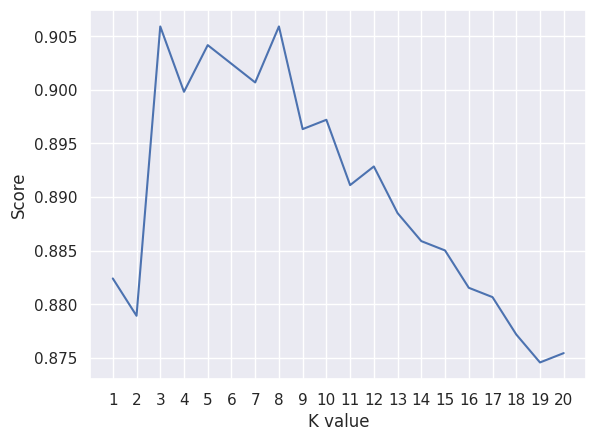

KNN best accuracy: 90.59%


In [76]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

## 4.3 Support Vector Machine

In [77]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       143
           1       0.95      0.98      0.97       143
           2       0.94      0.99      0.96       144
           3       0.95      0.97      0.96       144
           4       0.96      0.97      0.97       144
           5       0.96      0.98      0.97       143
           6       0.96      0.96      0.96       144
           7       0.99      0.93      0.96       143

    accuracy                           0.96      1148
   macro avg       0.96      0.96      0.96      1148
weighted avg       0.96      0.96      0.96      1148

[[130   3   3   4   1   1   1   0]
 [  0 140   1   1   0   1   0   0]
 [  1   1 142   0   0   0   0   0]
 [  0   1   0 140   2   1   0   0]
 [  0   0   0   0 140   3   1   0]
 [  1   0   0   0   0 140   2   0]
 [  1   1   1   0   2   0 138   1]
 [  0   1   4   2   1   0   2 133]]
SVC accuracy: 96.08%


## 4.4 Naive Bayes

In [78]:

NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       143
           1       0.95      0.98      0.97       143
           2       0.94      0.99      0.96       144
           3       0.96      0.96      0.96       144
           4       0.96      0.91      0.93       144
           5       0.93      0.98      0.95       143
           6       0.96      0.96      0.96       144
           7       0.99      0.92      0.95       143

    accuracy                           0.95      1148
   macro avg       0.95      0.95      0.95      1148
weighted avg       0.95      0.95      0.95      1148

[[130   3   3   4   1   1   1   0]
 [  0 140   1   1   0   1   0   0]
 [  1   1 142   0   0   0   0   0]
 [  0   1   0 138   2   3   0   0]
 [  9   0   0   0 131   3   1   0]
 [  1   0   0   0   0 140   2   0]
 [  1   1   1   0   2   0 138   1]
 [  0   1   4   1   1   3   2 131]]
Gaussian Naive Bayes accuracy: 94.95%


## 4.5 Decision Tree

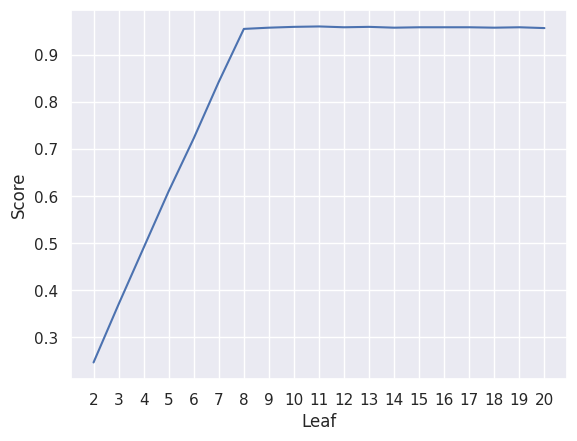

Decision Tree Accuracy: 96.08%


In [79]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

## 4.6 Random Forest

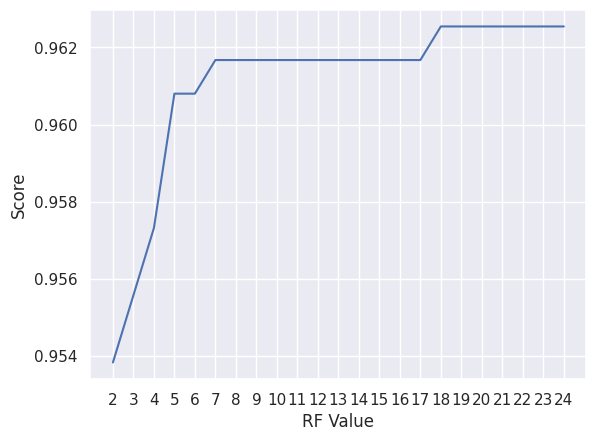

Random Forest Accuracy:  96.25%


In [80]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

## 4.7 XGBoost 

In [81]:
GBclassifier = GradientBoostingClassifier()
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       143
           1       0.95      0.98      0.96       143
           2       0.91      0.99      0.95       144
           3       0.97      0.97      0.97       144
           4       0.96      0.98      0.97       144
           5       0.95      0.97      0.96       143
           6       0.96      0.94      0.95       144
           7       0.99      0.92      0.95       143

    accuracy                           0.96      1148
   macro avg       0.96      0.96      0.96      1148
weighted avg       0.96      0.96      0.96      1148

[[130   3   3   4   1   1   1   0]
 [  0 140   1   1   0   1   0   0]
 [  1   1 142   0   0   0   0   0]
 [  0   2   0 139   2   1   0   0]
 [  0   0   0   0 141   3   0   0]
 [  1   1   0   0   0 138   2   1]
 [  1   1   3   0   2   0 136   1]
 [  0   0   7   0   1   1   2 132]]
Gradient Boosting accuracy: 95.64%


# 5. Modellerin Karsilastirilmasi 👀

In [82]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 
                                  'Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc2*100, DTAcc*100, 
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Random Forest,96.254355
2,SVM,96.080139
4,Decision Tree,96.080139
6,Gradient Boost,95.644599
0,Logistic Regression,95.034843
3,Gaussian NB,94.947735
1,K Neighbors,90.592334


Random Forest modelinin sınıflandırma doğruluğu açısından diğer modellerden daha iyi performans gösterdiği açıktır. Sınıflandırma sonuçlarını daha da iyileştirmek için, veri seti üzerinde bir özellik seçimi tekniği uygulayacak ve Rastgele Orman modeli için hiper-parametreleri belirleyeceğiz.

## 6.1  Rastgele Orman İçin Hiperparametre Ayarı

 Sınıflandırma sürecinde, Rastgele Orman algoritması içinde varsayılan parametreler kullanılmıştır, ancak maksimum yaprak düğümleri hariç tutulmuştur. Şu anda, parametreleri ince ayar yapmak için grid search (ızgara arama) yöntemi kullanarak parametre seçimini optimize etmeyi amaçlıyoruz.

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = [ 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [84]:
def Grid(X_train,y_train, model):
    rf_Grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, verbose=0, n_jobs = 4)
    r=rf_Grid.fit(X_train, y_train)
    
    return rf_Grid.best_params_
best_param=Grid(X_train,y_train, RFclassifier)
print ('Best parameters are: ', best_param)


Best parameters are:  {'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 17}


In [85]:
RFclassifier=RandomForestClassifier(bootstrap= True, max_depth= 4, max_features= 'sqrt', min_samples_leaf=1, min_samples_split= 2, n_estimators= 48)
RFclassifier.fit(X_train, y_train)
y_pred=RFclassifier.predict(X_test)
result = accuracy_score(y_pred,y_test)
print('Random Forest Classification Accuracy: {:.2f}%'.format(result*100))

Random Forest Classification Accuracy: 96.17%


Hiperparametreleri modele eklediğimizde, sınıflandırma doğruluğunun azaldığını görebiliriz. Modele ek parametreler dahil edildiğinde, bu parametrelerin getirdiği artan karmaşıklık nedeniyle sınıflandırma doğruluğu düşebilir. Bu durum, modelin aşırı öğrenmesi (overfitting) ile açıklanabilir. Aşırı öğrenme, modelin eğitim verisine gereğinden fazla uyum sağlaması, dolayısıyla verideki gürültüyü de öğrenerek yeni ve görülmemiş verilere genelleme yapma kabiliyetinin azalması anlamına gelir.

## 6.2 Özellik Seçimi

Modelin hangi özelliklere (feature) daha fazla önem verdiğini göstermek için "feature importance" değerlerini ekrana yansıtan bir bölüm eklenmiştir. Bu sayede kullanıcının girdiği verilerin model tahminlerine hangi oranda katkıda bulunduğu genel olarak görülebilir.

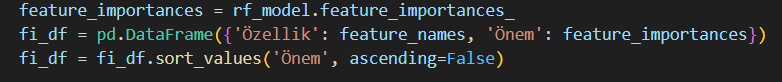

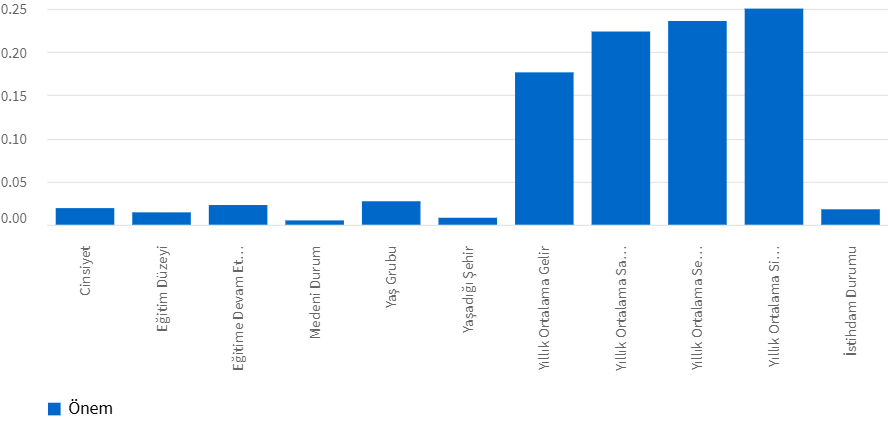